# Numerical Solutions

I have been interested in solving differential equation using numerical solutions for a long time.  It brings together a few disciplines that I have enjoyed:  programming, algorithms, physics and differential equations.  The diffusion equation describes the heat flow through an object over time.  In this exercise, I walk through a basic simulation of solving the temperature on a surface over time.  There is a hot spot on the surface at the start of the simulation and parts of the edge of the plane are held at a constant temperature. 

The Diffusion Equation, with no heat sources, is written as
\begin{equation}
k \cdot \nabla^2 u = \frac {\partial u}{\partial t}
\label{eq:heatEqn} \tag{1-1}
\end{equation}
where k, the thermal diffusivity value, a positive number describing how heat is diffused through an object. For the purposes of this project, we will assume that k is a constant throughout the object.  In practice, k is a function of the dimensions in the object.  

In rectilinear coordinates:
\begin{equation}
k \cdot \left( \frac {\partial^2 u}{\partial x^2} + \frac {\partial^2 u}{\partial y^2} \right) = \frac {\partial u}{\partial t}
\label{eq:heatEqnCartesian} \tag{1-2}
\end{equation}

and in cyclindrical coordinates:
\begin{equation}
k \cdot \left(\frac {\partial^2 u}{\partial \rho^2} + \frac{1}{\rho} \frac {\partial u}{\partial \rho} + 
\frac{1}{\rho^2} \frac {\partial^2 u}{\partial \phi^2} \right) = \frac {\partial u}{\partial t}
\label{eq:heatEqnCylindrical} \tag{1-3}
\end{equation}

The remainder of this exercise covers how to plot the behavior of the diffusion equation.  

The References section at the end of the page contains step by step instructions to:
- derive $\vec{\nabla u}(\rho, \phi)$ and $\nabla^2 u(\rho, \phi)$ from Cartesian Coordinates
- derive the Radial portion of the Heat Equation in Polar Coordinates

# Calculating u(x, y, t) Using the Finite Difference Method

The time-dependent diffusion equation can be solved in closed form.  However, it can be a challenge to use an infinite sum etc.  Alternatively, there are other methods that can be employed to calculate the temperature at each point on the geometry over time.  One of the methods is called the finite difference method.  This method is based on using the Taylor series expansion of a function to calculate each derivative order.  

For now, we will assume that we can approximate the solution using an average of the solution between two points $f(x_0 + \Delta x)$ and $f(x_0 - \Delta x)$.  There are other methods that can be used.  Starting with a function f(x), the Taylor series expansion of this function around a point $x_0$ at a distance of $\pm \Delta x$ from $x_0$
\begin{equation}
\begin{split}
f(x_0 + \Delta x) &= f(x_0) + (\Delta x) \frac{1}{1!} \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} + \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \\
f(x_0 - \Delta x) &= f(x_0) + (-\Delta x) \frac{1}{1!} \frac{df(x_0)}{dx} + \frac{1}{2!}(-\Delta x)^2 \frac{d^2f(x_0)}{dx^2} + \frac{1}{3!} (-\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (-\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \\
&= f(x_0) - (\Delta x) \frac{1}{1!} \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} - \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots 
\end{split}
\label{eq:taylorSeriesExp} \tag{2-1}
\end{equation}

The approximation for the first-order derivative can be found by taking the difference $f(x_0 + \Delta x) - f(x_0 - \Delta x)$
\begin{equation}
\begin{split} 
f(x_0 + \Delta x) - f(x_0 - \Delta x) &= \left[f(x_0) + (\Delta x) \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} + \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \right] - \left[ f(x_0) - (\Delta x) \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} - \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \right] \\
&= 2 (\Delta x) \frac{df(x_0)}{dx} + \frac{2 (\Delta x)^3}{3!} \frac{d^3f(x_0)}{dx^3} + \cdots \\
&= 2 (\Delta x) \frac{df(x_0)}{dx} + \frac{(\Delta x)^3}{3} \frac{d^3f(x_0)}{dx^3} + \cdots 
\text{odd terms}
\end{split}
\label{eq:taylorSeriesExpFirstDer} \tag{2-2}
\end{equation}

If we assume that $\Delta x \ll 1$, then we can assume that $(\Delta x)^3 \ll 1$ and subsequent terms can be ignored.  Having said that, we will need to keep in mind that since we are approximating the value of the derivative, there will be error terms to consider to ensure that the final numerical solution is guaranteed to converge.  More on this later.
\begin{equation}
\begin{split} 
f(x_0 + \Delta x) - f(x_0 - \Delta x) &= 2 (\Delta x) \frac{df(x_0)}{dx} + O((\Delta x)^3) \\
\frac{f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2} &= (\Delta x) \frac{df(x_0)}{dx} + O((\Delta x)^3)  \\
\frac{f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2} &\approx (\Delta x) \frac{df(x_0)}{dx} \\
\frac{df(x_0)}{dx} &\approx \frac{f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2 (\Delta x)}
\end{split}
\label{eq:taylorSeriesExpFirstDer2} \tag{2-3}
\end{equation}

The approximation for the second-order derivative can be found by taking the sum $f(x_0 + \Delta x) + f(x_0 - \Delta x)$
\begin{equation}
\begin{split} 
f(x_0 + \Delta x) + f(x_0 - \Delta x) &= \left[f(x_0) + (\Delta x) \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} + \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \right] + \left[ f(x_0) - (\Delta x) \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} - \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \right] \\
&= 2 f(x_0) + 2 (\frac{\Delta x^2}{2!}) \frac{d^2f(x_0)}{dx^2} + 2 (\frac{\Delta x^4}{4!}) \frac{d^4f(x_0)}{dx^4} + \cdots \text{even terms}
\end{split}
\label{eq:taylorSeriesExpSecondDer} \tag{2-4}
\end{equation}

Imposing the assumption that $\Delta x \ll 1$, then we can assume that $(\Delta x)^2 \ll 1$ and subsequent terms can be ignored.  
\begin{equation}
\begin{split} 
f(x_0 + \Delta x) + f(x_0 - \Delta x) &= 2 f(x_0) + 2 (\frac{(\Delta x)^2}{2}) \frac{d^2f(x_0)}{dx^2} + O({\Delta x^4}) \\
f(x_0 + \Delta x) + f(x_0 - \Delta x) &\approx 2 f(x_0) + 2 (\frac{(\Delta x)^2}{2}) \frac{d^2f(x_0)}{dx^2} \\
f(x_0 + \Delta x) + f(x_0 - \Delta x) - 2 f(x_0) &\approx (\Delta x)^2 \frac{d^2f(x_0)}{dx^2} \\
(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} &\approx f(x_0 + \Delta x) + f(x_0 - \Delta x) - 2 f(x_0)  \\
\frac{d^2f(x_0)}{dx^2} &\approx \frac{f(x_0 + \Delta x) + f(x_0 - \Delta x) - 2 f(x_0)}{(\Delta x)^2}
\end{split}
\label{eq:taylorSeriesExpSecondDer2} \tag{2-5}
\end{equation}

The next question is how do we use these results to calculate the temperature U at each point on the surface for each point in time.  Since we have the relationship to approximate the first-order and the second-order derivative, we will need a way to distinguish each coordinate value and time.  Since this is step is arbitrary, we will set the index i to represent the first coordinate (x or $\rho$), j to represent the second coordinate (y or $\phi$) and m represent some time increment. 

## Rectilinear Coordinates

The following figure illustrates the segments in which the temperature will be calculated for a rectangle.

![][rectsurf-id]

[rectsurf-id]: images/rectangular_geometry.png "Rectangular Surface"

The [rectangular surface][rectsurf-id] has sides of length X and Y and the time interval of interested spans from 0 to T.
The side X is divided into P segments, Y is divided into Q segments and the total time interval T is divided into R intervals:
\begin{equation}
\begin{split} 
\Delta x &= \frac{X}{P} \\
\Delta y &= \frac{Y}{Q} \\
\Delta t &= \frac{T}{R}
\end{split}
\label{eq:rectSurfaceDiscret} \tag{3-1}
\end{equation}

The indexes i, j, and m are related to the segments in space and time from $\eqref{eq:rectSurfaceDiscret}$ as
\begin{equation}
\begin{split} 
i \in \{0, 1, 2, \cdots, P - 1 \} \\
j \in \{0, 1, 2, \cdots, Q - 1 \} \\
m \in \{0, 1, 2, \cdots, R - 1 \}
\end{split}
\label{eq:rectSurfaceDiscret2} \tag{3-2}
\end{equation}

The heat equation becomes
\begin{equation}
\begin{split} 
u(x, y, t) &= u_{i,j}^m \\
u(x + \Delta x, y, t) &= u_{i + 1 ,j}^m \\
u(x - \Delta x, y, t) &= u_{i - 1 ,j}^m \\
u(x, y + \Delta y, t) &= u_{i,j + 1}^m \\
u(x, y - \Delta y, t) &= u_{i,j - 1}^m \\
u(x, y, t + \Delta t) &= u_{i,j}^{m + 1} \\
u(x, y, t - \Delta t) &= u_{i,j}^{m - 1} 
\end{split}
\label{eq:rectSurfaceDiscret3} \tag{3-3}
\end{equation}

### Numerical Solution in Rectilinear Coordinates

In order to use the finite difference method to calculate the temperature at any box in the rectangular surface for any time segment m, we need to convert the Heat Equation ([1-2](#eq:heatEqnCartesian)) into an algebraic equation.  

\begin{equation}
\begin{split}
k \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right )= \frac{\partial u}{\partial t}
\end{split}
\label{eq:heatEqnCartesian} \tag{5-0}
\end{equation}

Combining equations ([1-2](#eq:heatEqnCartesian)), ([2-3](#eq:taylorSeriesExpFirstDer2)), and ([2-5](#eq:taylorSeriesExpSecondDer2)), the finite difference method generates the following terms to replace the partial derivatives:
\begin{equation}
\begin{split} 
\frac{df}{dt} &\approx k \left ( \frac{f(x, y, t + \Delta t) - f(x, y, t)}{\Delta t} \right ) \\
&= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m}}{2 (\Delta t)} \\
\frac{d^2f}{dx^2} &\approx \frac{f(x + \Delta x, y, t) + f(x - \Delta x, y, t) - 2 f(x, y, t)}{(\Delta x)^2} \\
&= \frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta x)^2} \\
\frac{d^2f}{dy^2} &\approx \frac{f(x, y + \Delta y, t) + f(x, y - \Delta y, t) - 2 f(x, y, t)}{(\Delta y)^2} \\
&= \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta y)^2}  
\end{split} 
\label{eq:finiteDiffRaw} \tag{5-1}
\end{equation}

The time derivative, $\frac{df}{dt} \approx \frac{f(x, y, t + \Delta t) - f(x, y, t)}{\Delta t}$ is the definition of the derivative.

And the PDE becomes
\begin{equation}
\begin{split}
\underbrace{\frac{u_{i,j}^{m + 1} - u_{i,j}^{m}}{\Delta t}}_{\frac {\partial u}{\partial t}} = k \left (\underbrace{\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta x)^2}}_{\frac {\partial^2 u}{\partial x^2}} + \underbrace{\frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta y)^2}}_{\frac {\partial^2 u}{\partial y^2}} \right )
\end{split}
\label{eq:finiteDiffPDE} \tag{5-2}
\end{equation}

The $\Delta x$ and $\Delta y$ terms are going to be small, but not too small to ensure that amount of time and memory needed to perform the calculation is optimized.  For now, we will assume that $\Delta x$ = $\Delta y$. 
\begin{equation}
\begin{split} 
k \left (\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i, j}^m}{(\Delta x)^2} + \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta y)^2} \right ) &= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m}}{\Delta t} \\
k \left (\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i, j}^m}{(\Delta x)^2} + \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta x)^2} \right ) &= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m}}{\Delta t} \\
k \left (\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i, j}^m + u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta x)^2} \right ) &=  \frac{u_{i,j}^{m + 1} - u_{i,j}^{m - 1}}{\Delta t} \\
k \left (\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m + u_{i,j + 1}^m + u_{i,j - 1}^m - 4 u_{i,j}^m}{(\Delta x)^2} \right ) &=  \frac{u_{i,j}^{m + 1} - u_{i,j}^{m}}{\Delta t} \\
\frac{k \Delta t}{(\Delta x)^2}(u_{i + 1 ,j}^m + u_{i - 1 ,j}^m + u_{i,j + 1}^m + u_{i,j - 1}^m - 4 u_{i,j}^m) + u_{i,j}^{m} &= u_{i,j}^{m + 1}
\end{split}
\label{eq:finiteDiffFinal} \tag{5-3}
\end{equation}

### Stability Analysis (VonNeumann)

There is one parameter that needs to be defined so that the numerical solution remains stable; that is the solution does not change as a result of the error terms approximating the first and second order derivatives becoming too large.  If the terms that were ignored (equations  ([2-3](#eq:taylorSeriesExpFirstDer2)), and ([2-5](#eq:taylorSeriesExpSecondDer2)) ), like $O((\Delta x)^3)$ and $O((\Delta x)^4)$ are large, then the solution each one or more points can diverge from the actual solution.

Since the diffusion equation is a linear PDE with solutions, we can use VonNeumann stability analysis to determine the relationship between $\Delta x$ and $\Delta t$ so that we know the maximum size of the spacing in space and time for the numerical solution to converge for time periods.

There are many references describing how VonNeumann stability analysis works.  The gist of the idea is to ensure that the solution is not amplified between time segments.  That means when we calculate the temperature at a point at some time m, the solution does at time m + 1 will not grow out of control; the temperature at m + 1 should only change based on the temperature of the surrounding blocks and its own previous temperature.  In other words the growth factor, Q (also known as the amplification factor) should always be $\vert Q \vert \leq$ 1.  We start with the assumption that the error at any point in time and space is calculated using the Fourier decomposition of the form

\begin{equation}
\epsilon^{m}_{j, l} = Q^{m}e^{i(\alpha x + \beta y)}
\label{eq:vonNeuman1} \tag{6-1}
\end{equation}

where $\epsilon^{m}_{j, l}$ represents the total error of $u^{m}_{j, l}$ at a time step m based on the amplification factor  $Q^{m}$ and the "oscillating" portion of the error in space $e^{i(\alpha x + \beta y)}$.

Since we are currently examining the stability of the numerical solution for a rectangular surface, the values of $\alpha \Delta x$ and $\beta \Delta y$ will represent the accumulated error (round-off) of the x and y values respectively.  
\begin{equation}
\begin{split}
\epsilon^{m}_{j, l} &= Q^{m}e^{i(\alpha x + \beta y)} \\
\epsilon^{m+1}_{j, l} &= Q^{m+1}e^{i(\alpha x + \beta y)} = Q Q^{m}e^{i(\alpha x + \beta y)} \\
\epsilon^{m}_{j+1, l} &= Q^{m}e^{i(\alpha (x + \Delta x) + \beta y)} \\
\epsilon^{m}_{j-1, l} &= Q^{m}e^{i(\alpha (x - \Delta x) + \beta y)} \\
\epsilon^{m}_{j, l+1} &= Q^{m}e^{i(\alpha x + \beta (y + \Delta y))} \\
\epsilon^{m}_{j, l-1} &= Q^{m}e^{i(\alpha x + \beta (y - \Delta y))} 
\end{split}
\label{eq:vonNeuman2} \tag{6-2}
\end{equation}

The discretized equation calculating the error is based on the original solution for $u_{j,l}^{m}$ :
\begin{equation}
\begin{split}
\epsilon_{j,l}^{m + 1} &= \frac{k \Delta t}{(\Delta x)^2}(\epsilon_{j + 1,l}^m + \epsilon_{j - 1 ,l}^m + \epsilon_{j,l + 1}^m + \epsilon_{j,l - 1}^m - 4 \epsilon_{j,l}^m) + \epsilon_{j, l}^{m} 
\end{split}
\label{eq:vonNeuman3} \tag{6-3}
\end{equation}

becomes
\begin{equation}
\begin{split}
Q Q^{m}e^{i(\alpha x + \beta y)} = \frac{k \Delta t}{(\Delta x)^2} \cdot \left(Q^{m}e^{i(\alpha (x + \Delta x) + \beta y)} + Q^{m}e^{i(\alpha (x - \Delta x) + \beta y)} + Q^{m}e^{i(\alpha x + \beta (y + \Delta y))} + Q^{m}e^{i(\alpha x + \beta (y - \Delta y))} - 4 \cdot Q^{m}e^{i(\alpha x + \beta y)}\right) \\ 
+ Q^{m}e^{i(\alpha x + \beta y)} 
\end{split}
\label{eq:vonNeuman4} \tag{6-4}
\end{equation}

Let 
\begin{equation}
s = \frac{k \Delta t}{(\Delta x)^2}
\label{eq:vonNeuman5} \tag{6-5}
\end{equation}

and recall from complex variables and trigonometry that 
\begin{equation}
cos(x) = \frac{e^{ix} + e^{-ix}}{2} 
\label{eq:vonNeuman6} \tag{6-6}
\end{equation}

Divide both sides by $Q^{m}e^{i(\alpha x + \beta y)}$
\begin{equation}
\begin{split}
Q &= s \cdot (e^{i(\alpha \Delta x)} + e^{i(\alpha (-\Delta x))} + e^{i(\beta \Delta y)} + e^{i(\beta (-\Delta y))} - 4) + 1 \\
&= s \cdot (e^{i(\alpha \Delta x)} + e^{-i(\alpha \Delta x)} + e^{i(\beta \Delta y)} + e^{-i(\beta \Delta y)} - 4) + 1 \\
&= s \cdot (2 cos (\alpha \Delta x) + 2 cos (\beta \Delta y) - 4) + 1 \\
&= 1 + 2 s \cdot (cos (\alpha \Delta x) + cos (\beta \Delta y) - 2) \\
&= 1 + 2 s \cdot (cos (\alpha \Delta x) + cos (\beta \underbrace{\Delta y}_{\text{=$\Delta$x, earlier assumption}}) - 2) \\
&= 1 + 2 s \cdot (2 cos (\alpha \Delta x) - 2) \\
&= 1 + 4 s \cdot (cos (\alpha \Delta x) - 1)
\end{split}
\label{eq:vonNeuman7} \tag{6-7}
\end{equation}

Stability exists $\vert Q \vert \leq$ 1.  The goal is to determine the largest value of s such that  $\vert Q \vert \leq$ 1. We need to determine when Q is maximized.  By inspection, Q is at its largest value when $\alpha \Delta x$ = $\pi$.
\begin{equation}
\begin{split}
Q &= 1 + 4 s \cdot (cos (\pi) - 1) \\
&= 1 + 4 s \cdot (-1 - 1) \\
&= 1 + 4 s \cdot (-2) \\
&= 1 - 8 s 
\end{split}
\label{eq:vonNeuman8} \tag{6-8}
\end{equation}

Since $\vert Q \vert \leq$ 1, the following condition arises:
\begin{equation}
-1 \leq 1 - 8 s \leq 1
\label{eq:vonNeuman9} \tag{6-9}
\end{equation}

For $1 - 8 s \leq 1$, we have $s \leq 0 $.  For $-1 \leq 1 - 8 s$, we have $s \leq \frac{1}{4}$.  This means that there is a relationship between stability factor, s, and the values that can be chosen for $\Delta x$ and  $\Delta t$.  In other words, the number of time segments is directly related to the size of the $\Delta x$:
\begin{equation}
\begin{split}
s \leq \frac{1}{4} = \frac{k \Delta t}{(\Delta x)^2} \\
\Delta t = \frac{k (\Delta x)^2}{4}
\end{split}
\label{eq:vonNeuman10} \tag{6-10}
\end{equation}


## Cylindrical Coordinates

The following figure illustrates the segments in which the temperature will be calculated for a circle.

![][cylsurf-id]

[cylsurf-id]: images/circular_geometry.png "Circular Surface"

The [circular surface][cylsurf-id] has radius a, angular coordinate $\phi$ and the time interval of interested spans from 0 to T.
The radius a is divided into P segments, $\phi$ is divided into Q segments and the total time interval T is divided into R intervals:
\begin{equation}
\begin{split} 
\Delta \rho &= \frac{a}{P} \\
\Delta \phi &= \frac{2\pi}{Q} \\
\Delta t &= \frac{T}{R}
\end{split}
\label{eq:cylSurfaceDiscret} \tag{4-1}
\end{equation}

The indexes i, j, and m are related to the segments in space and time from $\eqref{eq:cylSurfaceDiscret}$ as
\begin{equation}
\begin{split} 
i \in \{0, 1, 2, \cdots, P - 1 \} \\
j \in \{0, 1, 2, \cdots, Q - 1 \} \\
m \in \{0, 1, 2, \cdots, R - 1 \}
\end{split}
\label{eq:cylSurfaceDiscret2} \tag{4-2}
\end{equation}

The heat equation becomes 
\begin{equation}
\begin{split} 
u(\rho, \phi, t) &= u_{i,j}^m \\
u(\rho + \Delta \rho, \phi, t)  &= u_{i + 1 ,j}^m \\
u(\rho - \Delta \rho, \phi, t) &= u_{i - 1 ,j}^m \\
u(\rho, \phi + \Delta \phi, t) &= u_{i,j + 1}^m \\
u(\rho, \phi - \Delta \phi, t) &= u_{i,j - 1}^m \\
u(\rho, \phi, t + \Delta t) &= u_{i,j}^{m + 1} \\
u(\rho, \phi, t - \Delta t) &= u_{i,j}^{m - 1} 
\end{split}
\label{eq:cylSurfaceDiscret3} \tag{4-3}
\end{equation}

### Numerical Solution in Cylindrical Coordinates

In order to use the finite difference method to calculate the temperature at any box in the circular surface for any time segment m, we need to convert the Heat Equation ([1-3](#eq:heatEqnCylindrical)) into an algebraic equation.  

\begin{equation}
\begin{split}
k \left (\frac {\partial^2 u}{\partial \rho^2} + \frac{1}{\rho} \frac {\partial u}{\partial \rho} + 
\frac{1}{\rho^2} \frac {\partial^2 u}{\partial \phi^2} \right ) = \frac {\partial u}{\partial t}
\end{split}
\label{eq:heatEqnCylindrical} \tag{}
\end{equation}

Combining equations ([1-3](#eq:heatEqnCylindrical)), ([2-3](#eq:taylorSeriesExpFirstDer2)), and ([2-5](#eq:taylorSeriesExpSecondDer2)), the finite difference method generates the following terms to replace the partial derivatives:
\begin{equation}
\begin{split} 
\frac{df}{dt} &\approx \frac{f(\rho, \phi, t + \Delta t) - f(\rho, \phi, t)}{\Delta t} \\
&= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m}}{\Delta t} \\
\frac{df}{d\rho} &\approx \frac{f(\rho +\Delta \rho, \phi, t) - f(\rho - \Delta \rho, \phi, t )}{2 (\Delta \rho)} \\
&= \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} \\
\frac{d^2f}{d\rho^2} &\approx \frac{f(\rho + \Delta \rho, \phi, t) + f(\rho - \Delta \rho, \phi, t) - 2 f(\rho, \phi, t)}{(\Delta \rho)^2} \\
&= \frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} \\
\frac{d^2f}{d\phi^2} &\approx \frac{f(\rho, \phi + \Delta, t) + f(\rho, \phi - \Delta \phi, t) - 2 f(\rho, \phi, t)}{(\Delta \phi)^2} \\
&= \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2}  
\end{split} 
\label{eq:finiteDiffPDECyl1} \tag{7-1}
\end{equation}

Since the coordinate $\rho$ is discretized, it get replaced by $\rho_i$ since we have to us the value of $\rho$ at each point in the mesh.
\begin{equation}
\begin{split}
\frac {\partial u}{\partial t} &= k \left( \frac {\partial^2 u}{\partial \rho^2} + \frac{1}{\rho} \frac {\partial u}{\partial \rho} + \frac{1}{\rho^2} \frac {\partial^2 u}{\partial \phi^2} \right )
\end{split}
\label{eq:finiteDiffPDECyl2} \tag{7-2}
\end{equation}

becomes

\begin{equation}
\begin{split}
\frac{u_{i,j}^{m + 1} - u_{i,j}^{m}}{\Delta t} &= k  \left [\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} + 
\frac{1}{\rho_i} \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} +
\frac{1}{(\rho_i)^2} \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2} \right ]\\
u_{i,j}^{m + 1} - u_{i,j}^{m} &= k \cdot \Delta t \left[\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} + 
\frac{1}{\rho_i} \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} +
\frac{1}{(\rho_i)^2} \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2} \right]  \\
u_{i,j}^{m + 1} &= k \cdot \Delta t \left[\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} + 
\frac{1}{\rho_i} \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} +
\frac{1}{(\rho_i)^2} \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2} \right] +  u_{i,j}^{m} \\
&= k \cdot \Delta t \left[\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} + 
\frac{1}{\Delta \rho \cdot i} \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} +
\frac{1}{(\Delta \rho \cdot i)^2} \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2} \right] +  u_{i,j}^{m} \\
&= \frac{k \Delta t}{(\Delta \rho)^2} \left[\left (u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m \right) + 
\frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 \cdot i} +
\frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{i^2 \cdot (\Delta \phi)^2} \right] +  u_{i,j}^{m} 
\end{split}
\label{eq:finiteDiffPDECyl3} \tag{7-3}
\end{equation}

This was solved for $\rho$ > 0.  We need to look at the case when $\rho$ = 0 as a special case, because the PDE terms
\begin{equation}
\lim_{\rho^{+} \rightarrow 0} \frac{1}{\rho}\rightarrow \infty 
\label{eq:considerCenter} \tag{7-4}
\end{equation}
For completeness, the previous limit specifies $\rho^{+} \rightarrow 0$ as approaching 0 from the positive side of the number line as we do not consider negative length values.

#### Special Case $\rho$ = 0

So, how do we discretize the PDE in this case.  First, we can use use L'Hopital's rule to determine if this term converges, and then, to which value.

\begin{equation}
\lim_{\rho^{+} \rightarrow 0} \frac{1}{\rho} \frac {\partial u}{\partial \rho} \rightarrow \infty \\
L'Hopital's Rule: \\
\lim_{\rho^{+} \rightarrow 0} \frac{\frac {\partial u}{\partial \rho} \left(\frac {\partial u}{\partial \rho} \right) }{\frac {\partial u}{\partial \rho} \left(\rho\right)} =
\lim_{\rho^{+} \rightarrow 0} \frac{\frac{\partial^2 u}{\partial \rho^2}}{1} =
\frac{\partial^2 u}{\partial \rho^2}
\label{eq:considerCenter2} \tag{7-5}
\end{equation}

Now, for $\rho $ = 0 (i = 0) the resulting discretized PDE is
\begin{equation}
\begin{split}
s &= \frac{k \Delta t}{(\Delta \rho)^2} \\
u_{i}^{m + 1} &= s \left(u_{i + 1}^m + u_{i - 1 }^m - 2 u_{i}^m \right) +  u_{i}^{m} \\
u_{0}^{m + 1} &= s \left(u_{1}^m + u_{- 1}^m - 2 u_{0}^m \right) +  u_{0}^{m} \\
&= s \left(u_{1}^m + \underbrace{u_{- 1}^m}_{\text{=0, the term does not exist}} - 2 u_{0}^m \right) +  u_{0}^{m} \\
&= s \left(u_{1}^m - 2 u_{0}^m \right) +  u_{0}^{m} \\
&= s u_{1}^m + (1 - 2s) u_{0}^m 
\end{split}
\label{eq:considerCenter3} \tag{7-6}
\end{equation}

Next, we must determine when this solution is numerically stable.

### Von Neumann Stability Analysis for the Special Case $\rho$ = 0

As discussed in the rectilinear example, the amplification factor, Q, must be $\vert Q \vert \leq$ 1 in order for the numerical solution to converge (i.e. stable). 
Let,

\begin{equation}
\begin{split}
u^{m}_{0} &= Q^{m}e^{i\alpha \rho} = Q^{m}e^{i\alpha \cdot 0} = Q^{m} \\
u^{m+1}_{0} &= Q^{m+1}e^{i\alpha \rho} = Q Q^{m}e^{i\alpha \rho} = Q Q^{m}e^{i\alpha \cdot 0} = Q Q^{m} \\
u^{m}_{1} &= Q^{m}e^{i\alpha (\rho + \Delta \rho)} = Q^{m}e^{i\alpha (0 + \Delta \rho)} = Q^{m}e^{i\alpha \Delta \rho}
\end{split}
\label{eq:vonNeumannCenter1} \tag{7-7}
\end{equation}

Then,
\begin{equation}
\begin{split}
u_{0}^{m + 1} &= s u_{1}^m + (1 - 2s) u_{0}^m \\
Q Q^{m} &= s \cdot Q^{m}e^{i\alpha \Delta \rho} + (1-2s) Q^{m} \\
Q &= s \cdot e^{i\alpha \Delta \rho} + (1-2s) \\
&= s \cdot \left( cos(\alpha \Delta \rho) + i sin(\alpha \Delta \rho) \right) + (1-2s) \\
&= s \cdot cos(\alpha \Delta \rho) + i \cdot s \cdot sin(\alpha \Delta \rho)  + (1-2s) \\
&= \left( s \cdot cos(\alpha \Delta \rho) + (1-2s) \right)  + i \cdot s \cdot sin(\alpha \Delta \rho)  
\end{split}
\label{eq:vonNeumannCenter2} \tag{7-8}
\end{equation}


Since $\vert Q \vert \leq$ 1, the following condition arises:
\begin{equation}
\begin{split}
Q = (s \cdot cos(\alpha \Delta \rho) + (1-2s) ) + i \cdot s \cdot sin(\alpha \Delta \rho)  \\
Q^{*} = (s \cdot cos(\alpha \Delta \rho) + (1-2s) ) - i \cdot s \cdot sin(\alpha \Delta \rho)  
\end{split}
\label{eq:vonNeumannCenter3} \tag{7-9}
\end{equation}

Therefore,
\begin{equation}
\begin{split}
&-1 \leq \sqrt{Q \cdot Q^{*}} \leq 1 \\
&-1 \leq \sqrt{\left[\left( s \cdot cos(\alpha \Delta \rho) + (1-2s) \right)  + i \cdot s \cdot sin(\alpha \Delta \rho)\right] \cdot 
\left[\left( s \cdot cos(\alpha \Delta \rho) + (1-2s) \right)  - i \cdot s \cdot sin(\alpha \Delta \rho)\right]} \leq 1 \\
&-1 \leq \sqrt{\left( s \cdot cos(\alpha \Delta \rho) + (1-2s) \right)^2  + s^2 \cdot sin^2(\alpha \Delta \rho)} \leq 1 \\ 
&-1 \leq \left( s \cdot cos(\alpha \Delta \rho) + (1-2s) \right)^2  + s^2 \cdot sin^2(\alpha \Delta \rho) \leq 1 \\
&-1 \leq s^2 \cdot cos^2(\alpha \Delta \rho) + (1-2s)^2 + 2(1-2s)(s \cdot cos(\alpha \Delta \rho)) + s^2 \cdot sin^2(\alpha \Delta \rho) \leq 1 \\
&-1 \leq \underbrace{s^2 \cdot cos^2(\alpha \Delta \rho) + s^2 \cdot sin^2(\alpha \Delta \rho)}_{\text{=s$^2$, since $ sin^2 x + cos^2x $ = 1}}  + (1-2s)^2 + 2s(1-2s)(cos(\alpha \Delta \rho)) \leq 1 \\
&-1 \leq s^2 + \underbrace{(1-2s)^2}_{=1-4s+4s^2} + 2s(1-2s)(cos(\alpha \Delta \rho)) \leq 1 \\
&-1 \leq 1-4s+5s^2 + 2s(1-2s)(cos(\alpha \Delta \rho)) \leq 1 
\end{split}
\label{eq:vonNeumannCenter4} \tag{7-10}
\end{equation}

Since $1-4s+5s^2 + 2s(1-2s)(cos(\alpha \Delta \rho))$, reaches its max when $cos(\alpha \Delta \rho)$ = -1 or when $\alpha \Delta \rho = \pi$
\begin{equation}
\begin{split}
&-1 \leq 1 - 4s + 5s^2 + 2s(1-2s)(cos(\alpha \Delta \rho)) \leq 1 \\
&-1 \leq 1 - 4s + 5s^2 + 2s(1-2s)\underbrace{(cos(\alpha \Delta \rho))}_{=-1} \leq 1 \\ 
&-1 \leq 1 - 4s + 5s^2 + 2s(1-2s)(-1) \leq 1 \\ 
&-1 \leq 1 - 4s + 5s^2 - 2s(1-2s) \leq 1 \\ 
&-1 \leq 1 - 4s + 5s^2 - 2s + 4s^2 \leq 1 \\ 
&-1 \leq 9s^2 - 6s + 1 \leq 1 
\end{split}
\label{eq:vonNeumannCenter5} \tag{7-11}
\end{equation}

For $9s^2 - 6s + 1 \leq 1 $ ,
\begin{equation}
\begin{split}
9s^2 - 6s + 1 \leq 1  \\
9s^2 - 6s \leq 0  \\
s \cdot (9s - 6) \leq 0  \\
s \leq 0 \\ or, \\
s \leq \frac{2}{3}
\end{split}
\label{eq:vonNeumannCenter6} \tag{7-12}
\end{equation}

For $-1 \leq 9s^2 -6s + 1 $ ,
\begin{equation}
\begin{split}
-1 \leq 9s^2 - 6s + 1  \\
0 \leq 9s^2 - 6s + 2 
\end{split}
\label{eq:vonNeumannCenter7} \tag{7-13}
\end{equation}

The roots of $9s^2 - 6s + 2$ are complex, and not applicable for this situation because there are no time steps with complex values - only real numbers.  Therefore, the largest value of s that will satisfy the vonNewman stability condition is s $\leq \frac{2}{3}$ for $\rho = 0$.  We have already accepted a value of s $\leq \frac{1}{2}$ for $\rho \gt$ 0.  So, it is reasonable to use s = $\frac{1}{2}$ for $\rho \geq 0$.

### Complete Numerical Solution

To summarize, the numerical solution to the heat Equation is $i \gt 0$
\begin{equation}
\begin{split}
u_{i,j}^{m + 1} &= k (\Delta t) \left[\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} + 
\frac{1}{\rho_i} \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} +
\frac{1}{(\rho_i)^2} \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2} \right] +  u_{i,j}^{m} 
\end{split}
\label{eq:vonNeumannCenter1} \tag{7-14}
\end{equation}

where
\begin{equation}
\begin{split}
s &= \frac{k \Delta t}{(\Delta \rho)^2}
\end{split}
\label{eq:vonNeumannCenter2} \tag{7-15}
\end{equation}

and $i = 0$
\begin{equation}
\begin{split}
u_{0}^{m + 1} &= s u_{1}^m + (1 - 2s) u_{0}^m 
\end{split}
\label{eq:vonNeumannCenter3} \tag{7-16}
\end{equation}

This means we need to know the value of $u_{1}^0$ and $u_{0}^0$ as part of the initial conditions.


# Examples In Two-Dimensions

It is in this section where the magic happens.  The following example is a demonstration of the solution created in 

## Example In A Square Plane

This example illustrates the temperature distribution in a square plane over time.  The Initial condition, that is time = 0, there is a small 10 x 10 area near the center of the square that is 50,000$^{\circ}$C.  The boundary conditions are such that along the y-axis at x=0 and x=L, the temperature is 10,000$^{\circ}$C. The number of time slices is 100.

In [ ]:
# Filename:  Plot2DHeat.py
# Purpose:   
#
%matplotlib notebook

# imports
import      sys
import      math as mth
import      matplotlib.pyplot as plt
import      matplotlib.animation as animation
import      matplotlib
import      numpy as np
from        matplotlib import cm
from        mpl_toolkits.mplot3d import Axes3D
from        IPython.display import HTML

class HeatOnRectangle():
    def __init__(self, xmax= 100, ymax= 100, tmax=10, dx = 0.1, dy= 0.1, dt=0.01, frames=50, bDebug = False):
        #Global debug
        self.bDebug = bDebug
        
        #Init physical grid for calculation
        self.dt = dt
        self.dx = dx
        self.dy = dy
        self.Tmax = tmax
        self.Xmax = xmax
        self.Ymax = ymax
        self.frames = frames
        
        self.t = np.linspace(0, tmax, 1)
        self.x = np.linspace(0, xmax, xmax+1)
        self.y = np.linspace(0, ymax, ymax+1)   
        self.u = np.zeros([len(self.x), len(self.y)], float)
        self.uAnimation = np.zeros([len(self.x), len(self.y), self.frames + 1], float)
        
        #init graphical output
        self.fig = plt.figure()                                 # Create figure object
        self.fig.set_size_inches(10, 12)
        
        self.ax = Axes3D(self.fig, auto_add_to_figure=False)    # Create axes object
        self.fig.add_axes(self.ax)
        self.surf, = plt.plot([], [], [])                       # Create empty 3D line object
        self.ax.set_xlabel("x (cm)")
        self.ax.set_ylabel("y (cm)")
        self.ax.set_zlabel("Temp (C) u(x,y,t)")      
        self.X_ax, self.Y_ax = np.meshgrid(self.x,self.y)
        
    # end of __init__
    
    def __str__(self):
        '''
            This method is used to print the results of the function u.
        '''
        print ("u = %d".format(u))    
    # end of __str__

    def initSurface(self):
        '''
            initSurface:
            x and y are lists (vectors) that define the length and width of the rectangle            
            
            return:  array initialized with zero's
        '''
        if (self.bDebug == True):
            print("In initSurface")
            
        self.u = np.zeros([len(self.x), len(self.y)], float)

        return 

    def applyInitialConditionsAnim(self):
        '''
            applyInitialConditionsAnim:
            updates the temperature array with the temperature set at certain points (center) 
            at the first time segment.
            
            return - none
        '''
    
        if (self.bDebug == True):
            print("applyInitialConditionsAnim")
        
        #find some grid element near the center
        a = np.int32(np.floor(len(self.x)/2))
        b = np.int32(np.floor(len(self.y)/2))
                
        self.uAnimation[a-10:a+10, b-5:b+20, 0] = 50000.0

        if (self.bDebug == True):
            print (self.uAnimation[a, b, 0])
            print (self.uAnimation)
        
        return 

    def applyBoundaryConditionsAnim(self, bcXAxisMinY = 0.0, bcXAxisMaxY = 0.0, bcYAxisMinX = 0.0, bcYAxisMaxX = 0.0, t = 0.0):
        '''
            applyBoundaryConditionsAnim:
            updates the temperature array with the temperature set at certain points along the 
            edge(s) of the surface at some time segment t.

            return:  none
        '''
        #along the x-axis
        self.uAnimation[:, 0, t] = bcXAxisMinY
        
        #along the x-axis on the upper-side of the rectangle
        self.uAnimation[:, len(self.y)-1, t] = bcXAxisMaxY
        
        #along the y-axis
        self.uAnimation[0,:,t] = bcYAxisMinX
        
        #along the y-axis on the right-side of the rectangle
        self.uAnimation[len(self.x)-1, :, t] = bcYAxisMaxX

        if (self.bDebug == True):
            print (self.uAnimation)
        
        return
        
    def calcTempNextTimeSegmentAnim(self, t):
        '''
            calcTempNextTimeSegmentAnim:
            updates the temperature array for each internal point of the serface
            at some time segment t.

            return:  none
        '''

        for j in range(1, len(self.x)-1):
            if (self.bDebug == True):
                print ("j = ", j)
            for l in  range(1, len(self.y)-1):
                if (self.bDebug == True):
                    print ("l = ", l)
                self.uAnimation[j,l,t] = (1.0 / 4.0) * (self.uAnimation[j+1,l,t-1] + 
                                            self.uAnimation[j-1,l,t-1] + 
                                            self.uAnimation[j,l+1,t-1] + 
                                            self.uAnimation[j,l-1,t-1]) 

            if (self.bDebug == True):
                print (self.uAnimation)

        return

    def calcDataAnimation(self, bcXAxisMinY, bcXAxisMaxY, bcYAxisMinX, bcYAxisMaxX, tMax):
        '''
            calcDataAnimation:
            calls the functions necessary to calculate the temperature array for all time.

            return:  none
        '''

        #Generate the data throughout the time interval
        for t in range(1, tMax):        
            self.applyBoundaryConditionsAnim(bcXAxisMinY, bcXAxisMaxY, bcYAxisMinX, bcYAxisMaxX, t)
            self.calcTempNextTimeSegmentAnim(t)
        
        return 
    
    def calcDataForAnimation(self, nFrame, X, Y, plot):
        '''
            calcDataForAnimation:
            configures the calculations so that each time step will become
            a separate frame in the animation.

            return:  none
        '''
    
        plot[0].remove()

        plot[0] = self.ax.plot_surface(X, Y, self.uAnimation[:,:,nFrame], cmap=cm.coolwarm, linewidth=0, antialiased=False)

        #self.title.set_text("Heat distribution on the plane for time segment {}".format(nFrame))
        
        return 

    def animateSurfacePlot(self, T, X, Y, plot):
        '''
            calcDataForAnimation:
            configures the calculations so that each time step will become
            a separate frame in the animation.

            return:  none
        '''
        # call the animator.  blit=True means only re-draw the parts that have changed.
        anim = animation.FuncAnimation(self.fig, self.calcDataForAnimation, T, fargs=(X, Y, plot), blit=True)

        # save the animation as an mp4.  This requires ffmpeg or mencoder to be
        # installed.  The extra_args ensure that the x264 codec is used, so that
        # the video can be embedded in html5.  You may need to adjust this for
        # your system: for more information, see
        # http://matplotlib.sourceforge.net/api/animation_api.html
        #anim.save('basic_animation.mp4', fps=30)

        html = HTML(anim.to_html5_video())
        display(html)
        plt.close()
        
        return
    
    def plotSurface(self):
        '''
            plotSurface:
            main function that creates the grid (square by default) and then creates a 
            mpg frame for each time segment.

            return:  meshgrid, and the plot list
        '''

        X, Y = np.meshgrid(self.x,self.y)

        # Plot the surface.
        plot = [self.ax.plot_surface(self.X_ax, self.Y_ax, self.uAnimation[:,:,0], cmap=cm.coolwarm, linewidth=0, antialiased=False)]

        # Add a color bar which maps values to colors.
        cb = self.fig.colorbar(plot[0], shrink=0.5, aspect=5)
        cb.set_label("Temp (C)")
        
        return X, Y, plot,

# end of class HeatOnRectangle

 
# *****
# Python entry point
# *****
if __name__ == "__main__":
    '''
    Process to create an animiated graphic using FuncAnimation 
    1. Compute all data to be plotted.
    2. Explicitly define figure object.
    3. Define line objects to be altered dynamically.
    4. Create function to update line objects.
    5. Create FuncAnimation object.
    6. Display using plt.show().
    '''
    
    s = -0.20           
    T = 500                             # Number of time frames and max time for simulation
    N = 500                             # Length of x-axis side
    L = 500                             # Length of y-axis side
    Nx = 10000                          # Number of x-axis segments
    Ny = 10000                          # Number of y-axis segments
    Nt = 100                            # Number of time segments
    dx = N/Nx                           # size of x-axis segments
    dy = L/Ny                           # size of y-axis segments
    dt = mth.ceil(0.25 * (dx**2) / 2)   # size of time segments

    # Boundary Conditions
    bcXAxisMinY = -10000.0              # BC along the x-axis when y= 0
    bcXAxisMaxY = 0.0                   # BC along the x-axis when y= L
    bcYAxisMinX = 0.0                # BC along the x-axis when x = 0
    bcYAxisMaxX = 5000.0                # BC along the x-axis when x = N
    
    debug = False
    matplotlib.matplotlib_fname()

    #print ("Num time segs: ", dt)
    #sys.exit("done")

    #1. Compute all data to be plotted.
    #2. Explicitly define figure object.
    r = HeatOnRectangle(N, L, T, dx, dy, dt, T, debug)
    r.applyInitialConditionsAnim()
    r.calcDataAnimation(bcXAxisMinY, bcXAxisMaxY, bcYAxisMinX, bcYAxisMaxX, T)

    X, Y, plot = r.plotSurface()
    r.animateSurfacePlot(T, X, Y, plot )
    
    print ("Done!") 

<IPython.core.display.Javascript object>

# References

## Reference 1 - Derive $\vec{\nabla u}(\rho, \phi)$ and $\nabla^2 u(\rho, \phi)$

###  Derive the LaPlacian

The process to derive the gradient (in two dimensions), which is a vector,
\begin{equation}
\vec{\nabla u}(\rho,\phi)
\label{eq:refDerive1} \tag{R1-1}
\end{equation}

and the LaPlacian
\begin{equation}
\nabla^2 u(\rho,\phi) = \vec{\nabla u}(\rho,\phi) \cdot \vec{\nabla u}(\rho,\phi)
\label{eq:refDerive2} \tag{R1-2}
\end{equation}

The following diagram will be used to convert the LaPlacian from Cartesian to Polar coordinates.  The unit vectors are denoted in bold.
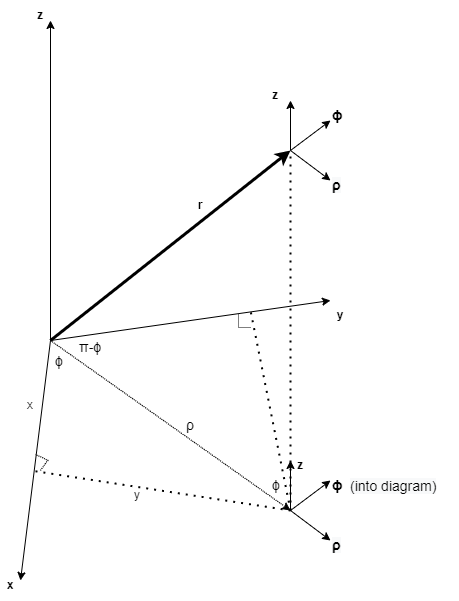
The operators in Cartesian coordinates and use the the well-known conversion identities:
\begin{equation}
x = \rho \cdot \cos(\phi)
\label{eq:refDerive3a} \tag{R1-3a}
\end{equation}

\begin{equation}
y = \rho \cdot \sin(\phi)
\label{eq:refDerive3b} \tag{R1-3b}
\end{equation}

or
\begin{equation}
\rho = \sqrt{x^2 + y^2}
\label{eq:refDerive3c} \tag{R1-3c}
\end{equation}

\begin{equation}
\phi = \tan^{-1} \left( \frac{y}{x} \right)
\label{eq:refDerive3d} \tag{R1-3d}
\end{equation}

and 

\begin{equation}
\vec{\mathbf{\nabla}} u(x,y) = \frac{\partial u}{\partial x} \hat{\mathbf{x}} + \frac{\partial u}{\partial y} \hat{\mathbf{y}}
\label{eq:refDerive4} \tag{R1-4}
\end{equation}

### Constructing Polar Coordinate Unit Vectors

Since we are dealing with vectors the next thing to consider, is how do the cylindrical coordinate unit vectors $\hat{\rho}$, $\hat{\phi}$ and $\hat{z}$ project onto the rectilinear coordinate $\hat{x}$, $\hat{y}$, and $\hat{z}$.  The remainder of this exercise will focus on 2 dimensions; only consider the $\hat{\rho}$ and $\hat{\phi}$ projection onto the $\hat{x}$, $\hat{y}$ unit vectors.  The key to this discussion is that unlike $\hat{x}$ and $\hat{y}$, $\hat{\rho}$ and $\hat{\phi}$ are not constant unit vectors; they vary with location.  

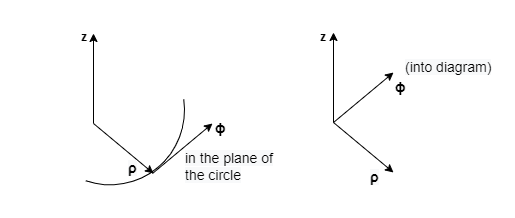
In the previous diagram, $\hat{\phi}$ is the unit vector along the radius of the circle and $\hat{\rho}$ is the polar angle unit vector.  The right-hand side of the diagram is the same as the left-hand side, but the vectors have been aligned to be centered at the pole (center).

Having said that, they are still orthogonal so that
$$\hat{\rho} \cdot \hat{\rho} = 1$$ 
$$\hat{\phi} \cdot \hat{\phi} = 1$$ 
$$\hat{\rho} \cdot \hat{\phi} = 0$$ 

### Create Coordinate Transforms

As shown in the following diagram, 

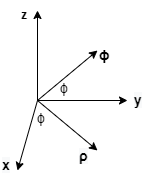

$\hat{\rho}$ and $\hat{\phi}$ will have components along both the $\hat{x}$ and $\hat{y}$ axes.  



The $\hat{\rho}$ is defined by the projection of the $\hat{x}$ and the $\hat{y}$ onto the $\hat{\rho}$ unit vector.  In the previous figure, the polar coordinate unit vectors are rotated by the angle $\phi$.  So the projection of the Cartesian unit vectors onto $\hat{\rho}$ is 
$$\hat{\rho} = \cos(\phi) \hat{x} + \sin(\phi) \hat{y}$$
Similarly, $\hat{\phi}$ is defined by the projection of $\hat{x}$ and the $\hat{y}$ onto the $\hat{\phi}$ unit vector.  The difference is that the $\hat{x}$ component is in the -$\hat{x}$ direction.  Using the same rotational angle between the two sets of coordinates, 
$$\hat{\phi} = -\sin(\phi) \hat{x} + \cos(\phi) \hat{y}$$

Then the derivatives are:
\begin{equation}
\begin{split}
\frac{\partial \hat{\rho}}{\partial \phi} &= \frac{\partial \hat{\rho}}{\partial \phi}\left(\cos(\phi) \hat{x} + \sin(\phi) \hat{y} \right) \\
&= \frac{\partial \hat{\rho}}{\partial \phi}\left(\cos(\phi) \hat{x}) \right) + \frac{\partial \hat{\rho}}{\partial \phi}\left(\sin(\phi) \hat{y} \right) \\
&= \hat{x} \frac{\partial \hat{\rho}}{\partial \phi}\cos(\phi) + \cos(\phi) \frac{\partial \hat{\rho}}{\partial \phi}\hat{x} 
+  \hat{y} \frac{\partial \hat{\rho}}{\partial \phi}\sin(\phi) + \sin(\phi) \frac{\partial \hat{\rho}}{\partial \phi}\hat{y} \\
&= \hat{x} \frac{\partial \hat{\rho}}{\partial \phi}\cos(\phi) + \cos(\phi) \underbrace{\frac{\partial \hat{\rho}}{\partial \phi}\hat{x}}_{= 0}
+  \hat{y} \frac{\partial \hat{\rho}}{\partial \phi}\sin(\phi) + \sin(\phi) \underbrace{\frac{\partial \hat{\rho}}{\partial \phi}\hat{y}}_{= 0} \\
&= \hat{x} (-\sin(\phi)) + \hat{y} \cos(\phi) \\
&= -\sin(\phi)\hat{x} + \cos(\phi)\hat{y}  \\
&= \hat{\phi}
\end{split}
\label{eq:refDerive5a} \tag{R1-5a}
\end{equation}

and similarly, 
\begin{equation}
\begin{split}
\frac{\partial \hat{\phi}}{\partial \phi} &= \frac{\partial \hat{\phi}}{\partial \phi}\left(-\sin(\phi) \hat{x} + \cos(\phi) \hat{y} \right) \\
&= \frac{\partial \hat{\phi}}{\partial \phi}\left(-\sin(\phi) \hat{x} \right) + \frac{\partial \hat{\phi}}{\partial \phi}\left(\cos(\phi) \hat{y} \right) \\
&= \hat{x} \frac{\partial \hat{\phi}}{\partial \phi}(-\sin(\phi)) + -\sin(\phi) \frac{\partial \hat{\phi}}{\partial \phi}\hat{x} 
+  \hat{y} \frac{\partial \hat{\phi}}{\partial \phi}\cos(\phi) + \cos(\phi) \frac{\partial \hat{\phi}}{\partial \phi}\hat{y} \\
&= \hat{x} \frac{\partial \hat{\phi}}{\partial \phi}(-\sin(\phi)) + -\sin(\phi) \underbrace{\frac{\partial \hat{\phi}}{\partial \phi}\hat{x}}_{= 0}
+  \hat{y} \frac{\partial \hat{\phi}}{\partial \phi}\cos(\phi) + \cos(\phi) \underbrace{\frac{\partial \hat{\phi}}{\partial \phi}\hat{y}}_{= 0} \\
&= \hat{x} (-\cos(\phi)) + \hat{y} (-\sin(\phi) \\
&= -\cos(\phi)\hat{x}  - \sin(\phi)\hat{y}  \\
&= -\hat{\rho}
\end{split}
\label{eq:refDerive5b} \tag{R1-5b}
\end{equation}

### Calculate The Gradient 

In order to calculate the gradient in cylindrical coordinates based on $\nabla$ operator in rectilinear coordinates, the previous equations will need to be changed in terms of  $\hat{x}$ and $\hat{y}$.  This can be done using matrix algebra.

$$\left(\begin{array}{cc} \cos(\phi) && \sin(\phi) \\ -\sin(\phi) && \cos(\phi) \end{array} \right) 
\left( \begin{array}{c} \hat{x} \\ \hat{y} \end{array} \right) = \left( \begin{array}{c} \hat{\rho} \\ \hat{\phi} \end{array} \right)$$

The determinant of the matrix is  
$$det = \cos(\phi) \cdot \cos(\phi) - (\sin(\phi) \cdot -\sin(\phi)) = \cos^2(\phi) + \sin^2(\phi) = 1 $$

Therefore,
$$\left( \begin{array}{c} \hat{x} \\ \hat{y} \end{array} \right) = \frac{1}{det} \left(\begin{array}{cc} \cos(\phi) && -\sin(\phi) \\ \sin(\phi) && \cos(\phi) \end{array} \right) \left( \begin{array}{c} \hat{\rho} \\ \hat{\phi} \end{array} \right)$$

and
$$\hat{x} = \cos(\phi) \hat{\rho} - \sin(\phi) \hat{\phi}$$
$$\hat{y} = \sin(\phi) \hat{\rho} + \cos(\phi) \hat{\phi}$$

Now we use the Chain Rule is used to calculate the partial derivatives in terms of $\rho$ and $\phi$ based on the conversion identities:
\begin{equation}
\frac {\partial u}{\partial x} = \frac {\partial u}{\partial \rho} \frac {\partial \rho}{\partial x} + \frac {\partial u}{\partial \phi}\frac {\partial \phi}{\partial x}
\label{eq:refDerive6} \tag{R1-6}
\end{equation}

\begin{equation}
\frac {\partial u}{\partial y} = \frac {\partial u}{\partial \rho} \frac {\partial \rho}{\partial y} + \frac {\partial u}{\partial \phi} \frac {\partial \phi}{\partial y}
\label{eq:refDerive7} \tag{R1-7}
\end{equation}

Substituting equations ([R1-6](#eq:refDerive6)), and ([R1-7](#eq:refDerive7)), we get
\begin{equation}
\begin{split}
\vec{\mathbf{\nabla}} u(x,y) & = \frac{\partial u}{\partial x} \hat{\mathbf{x}} + \frac{\partial u}{\partial y} \hat{\mathbf{y}} \\ & = \left( \frac {\partial u}{\partial \rho}\frac {\partial \rho}{\partial x} + \frac {\partial u}{\partial \phi}\frac {\partial \phi}{\partial x} \right) \left( \cos(\phi) \hat{\rho} - \sin(\phi) \hat{\phi} \right) \\ & + \left(\frac {\partial u}{\partial \rho}\frac {\partial \rho}{\partial y} + \frac {\partial u}{\partial \phi}\frac {\partial \phi}{\partial y} \right)  \left( \sin(\phi) \hat{\rho} + \cos(\phi) \hat{\phi} \right)
\end{split}
\label{eq:refDerive8} \tag{R1-8}
\end{equation}

From equations ([R1-3a](#eq:refDerive3a)) and ([R1-3b](#eq:refDerive3b))
\begin{equation} 
\begin{split}
\frac{\partial \rho}{\partial x} & = \frac{\partial }{\partial x} \left( \sqrt{x^2 + y^2} \right) \\ & = \frac{1}{2} \frac{2 x}{\sqrt{x^2 + y^2}} \\ & = \frac{x}{\sqrt{x^2 + y^2}}  \\ & = \frac{x}{\rho} \\ & = \cos(\phi)
\end{split}
\label{eq:refDerive9} \tag{R1-9}
\end{equation}

\begin{equation} 
\begin{split}
b = \frac{\partial \rho}{\partial y} & = \frac{\partial }{\partial y} \left( \sqrt{x^2 + y^2} \right) \\ & = \frac{1}{2} \frac{2 y}{\sqrt{x^2 + y^2}} \\ & = \frac{y}{\sqrt{x^2 + y^2}}  \\ & = \frac{y}{\rho} \\ & = \sin(\phi)
\end{split}
\label{eq:refDerive10} \tag{R1-10}
\end{equation}


As for the derivative of $\tan^{-1}\left( \frac{y}{x} \right)$
Let $$a = \arctan(b)$$ $$\therefore b = \tan(a)$$ and $$db = sec^2(a) \cdot da$$
\begin{equation} 
\begin{split}
\frac{da}{db} & = \frac{1}{\sec^2(a)} \\ & = \frac{1}{1 + \tan^2(a)} \\ & = \frac{1}{1 + b^2} 
\end{split}
\label{eq:refDerive11} \tag{R1-11}
\end{equation}
or 
$$da = \frac{1}{1 + b^2} db $$

Since b = $\frac{y}{x}$ then
\begin{equation} 
\begin{split}
\frac{\partial \phi}{\partial x} & = \frac{1}{1 + \frac{y^2}{x^2}} \cdot \frac{-y}{x^2} \\ & = \frac{x^2}{x^2 + y^2}\cdot \frac{-y}{x^2} \\ & = \frac{-y}{x^2 + y^2} \\ & = \frac{-y}{\rho^2} \\ & = \frac{-y}{\rho}\frac{1}{\rho} \\ & = \frac{-1}{\rho}\sin(\phi)
\end{split}
\label{eq:refDerive12} \tag{R1-12}
\end{equation}

and similarly, 
\begin{equation} 
\begin{split}
\frac{\partial \phi}{\partial y} & = \frac{1}{1 + \frac{y^2}{x^2}} \cdot \frac{1}{x} \\ & = \frac{x^2}{x^2 + y^2}\cdot \frac{1}{x} \\ & = \frac{x}{x^2 + y^2} \\ & = \frac{x}{\rho^2} \\ & = \frac{x}{\rho}\frac{1}{\rho} \\ & = \frac{1}{\rho}\cos(\phi)
\end{split}
\label{eq:refDerive13} \tag{R1-13}
\end{equation}

Now we have everything we need to derive the gradient in polar coordinates.

Substituting equations ([R1-9](#eq:refDerive9)), ([R1-10](#eq:refDerive10)), ([R1-12](#eq:refDerive12)), and ([R1-13](#eq:refDerive13)) we get
\begin{equation}
\begin{split}
\vec{\mathbf{\nabla}} u(x,y) & = 
\left( \frac {\partial u}{\partial \rho}\frac {\partial \rho}{\partial x} + \frac {\partial u}{\partial \phi}\frac {\partial \phi}{\partial x} \right) \left( \cos(\phi) \hat{\rho} - \sin(\phi) \hat{\phi} \right) \\ & + \left(\frac {\partial u}{\partial \rho}\frac {\partial \rho}{\partial y} + \frac {\partial u}{\partial \phi}\frac {\partial \phi}{\partial y} \right)  \left( \sin(\phi) \hat{\rho} + \cos(\phi) \hat{\phi} \right) 
\\ & =
\left( \frac {\partial u}{\partial \rho} \cos(\phi) + \frac {\partial u}{\partial \phi}\frac {-1}{\rho} \sin(\phi) \right) \left( \cos(\phi) \hat{\rho} - \sin(\phi) \hat{\phi} \right) \\ & + \left(\frac {\partial u}{\partial \rho}\sin(\phi) + \frac {\partial u}{\partial \phi}\frac {1}{\rho} \cos(\phi) \right)  \left( \sin(\phi) \hat{\rho} + \cos(\phi) \hat{\phi} \right)
\\ & = 
\Bigg\{ \frac {\partial u}{\partial \rho} \cos^{2}(\phi)\hat{\rho} - \frac {\partial u}{\partial \rho}\cdot \cos(\phi)\sin(\phi) \hat{\phi}+ \frac{\partial u}{\partial \phi} \left(\frac{-1}{\rho} \sin(\phi) \cos(\phi) \hat{\rho} \right) +  \frac{\partial u}{\partial \phi} \frac{1}{\rho} \sin^{2}(\phi) \hat{\phi} \Bigg\} \\ & + \Bigg\{\frac {\partial u}{\partial \rho}\sin^{2}(\phi)\hat{\rho} + \frac {\partial u}{\partial \rho}\cdot \sin(\phi)\cos(\phi) \hat{\phi} + \frac {\partial u}{\partial \phi}\left( \frac{1}{\rho}\sin(\phi)\cos(\phi)\hat{\rho} \right) + \frac{\partial u}{\partial \phi}\frac{1}{\rho}\cos^{2}(\phi) \hat{\phi} \Bigg\}
\\ & = 
\frac {\partial u}{\partial \rho} \left( \underbrace{ \cos^{2}(\phi) + \sin^{2}(\phi)}_{= 1} \right) \hat{\rho} + \frac {\partial u}{\partial \phi} \frac{1}{\rho} \left( \underbrace{\cos^{2}(\phi) + \sin^{2}(\phi)}_{= 1} \right) \hat{\phi} 
\\ & = 
\frac {\partial u}{\partial \rho} \hat{\rho} + \frac{1}{\rho} \frac {\partial u}{\partial \phi} \hat{\phi} 
\end{split}
\label{eq:refDerive14} \tag{R1-14}
\end{equation}



Now that we have the gradient in polar coordinates, we can derive the LaPlacian using the identity 
\begin{equation} 
\begin{split}
\nabla^2 u(\rho, \phi) & = \vec{\mathbf{\nabla}} u(\rho, \phi) \cdot \vec{\mathbf{\nabla}} u(\rho, \phi) 
\\ & =
\left( \frac{\partial u}{\partial \rho} \hat{\rho} + \frac{1}{\rho} \frac{\partial u}{\partial \phi} \hat{\phi} \right) \cdot \left( \frac{\partial u}{\partial \rho} \hat{\rho} + \frac{1}{\rho} \frac{\partial u}{\partial \phi} \hat{\phi} \right) 
\\ & =
\frac {\partial u}{\partial \rho} \hat{\rho} \cdot \frac {\partial u}{\partial \rho} \hat{\rho} + 
\frac {\partial u}{\partial \rho} \hat{\rho} \cdot \frac{1}{\rho} \frac {\partial u}{\partial \phi} \hat{\phi} +
\frac{1}{\rho} \frac {\partial u}{\partial \phi} \hat{\phi} \cdot \frac {\partial u}{\partial \rho} \hat{\rho} + 
\frac{1}{\rho} \frac {\partial u}{\partial \phi} \hat{\phi} \cdot \frac{1}{\rho} \frac {\partial u}{\partial \phi} \hat{\phi}
\\ & =
\hat{\rho} \frac {\partial u}{\partial \rho} \cdot \left( \frac {\partial u}{\partial \rho} \hat{\rho} \right) + 
\hat{\rho} \frac {\partial u}{\partial \rho} \cdot \left( \frac{1}{\rho} \frac {\partial u}{\partial \phi} \hat{\phi} \right) +
\hat{\phi} \frac{1}{\rho} \frac {\partial u}{\partial \phi}  \cdot \left (\frac {\partial u}{\partial \rho} \hat{\rho} \right) + 
\hat{\phi} \frac{1}{\rho} \frac {\partial u}{\partial \phi} \cdot \left( \frac{1}{\rho} \frac {\partial u}{\partial \phi} \hat{\phi} \right)
\\ & =
\hat{\rho} \cdot \Bigg\{\frac {\partial u}{\partial \rho} \frac{\partial u}{\partial \rho} \hat{\rho} + \frac {\partial u}{\partial \rho}\frac{\partial {\hat{\rho}}}{\partial \rho} \Bigg\} 
\\ & + 
\hat{\rho} \cdot \Bigg\{\frac {\partial u}{\partial \rho} \left(\frac{1}{\rho} \right) \frac {\partial }{\partial \phi} \hat{\phi} + \frac{1}{\rho}\frac {\partial u}{\partial \rho} \left(\frac {\partial }{\partial \phi} \right)\hat{\phi} + \frac{1}{\rho}\frac {\partial }{\partial \phi}\frac {\partial \hat{\phi}}{\partial \rho}  \Bigg\} 
\\ & + 
\hat{\phi} \frac{1}{\rho} \cdot \Bigg\{\frac {\partial u}{\partial \phi} \left( \frac {\partial u}{\partial \rho} \right) \hat{\rho} +  \frac {\partial u}{\partial \rho} \frac {\partial \hat{\rho}}{\partial \phi} \Bigg\} 
\\ & + 
\hat{\phi} \frac{1}{\rho^2} \cdot \Bigg\{\frac {\partial u}{\partial \phi} \left(\frac {\partial }{\partial \phi} \right) \hat{\phi} + \frac {\partial u}{\partial \phi} \frac {\partial \hat{\phi} }{\partial \phi} \Bigg\}
\\ & =
\hat{\rho} \cdot \Bigg\{\frac {\partial u}{\partial \rho} \left( \frac{\partial u}{\partial \rho} \right) \hat{\rho} + 0 \Bigg\} 
\\ & + 
0
\\ & + 
\hat{\phi} \frac{1}{\rho} \cdot \Bigg\{0 + \frac {\partial u}{\partial \rho} \hat{\phi}\Bigg\} 
\\ & + 
\hat{\phi} \frac{1}{\rho^2} \cdot \Bigg\{\frac {\partial u}{\partial \phi} \frac {\partial }{\partial \phi} \hat{\phi} + 0 \Bigg\}
\\ & =
\frac {\partial^2 u}{\partial \rho^2} \hat{\rho} \cdot \hat{\rho}
\\ & + 
\frac{1}{\rho} \frac {\partial u}{\partial \rho} \hat{\phi} \cdot \hat{\phi}
\\ & + 
\frac{1}{\rho^2} \frac {\partial^2 u}{\partial \phi^2} \hat{\phi} \cdot \hat{\phi}
\end{split}
\label{eq:refDerive14} \tag{R1-14}
\end{equation}

The final result is:
\begin{equation} 
\begin{split}
\nabla^2 u(\rho, \phi) = \frac {\partial^2 u}{\partial \rho^2} + \frac{1}{\rho} \frac {\partial u}{\partial \rho} + 
\frac{1}{\rho^2} \frac {\partial^2 u}{\partial \phi^2} 
\end{split}
\label{eq:refDerive15} \tag{R1-15}
\end{equation}

## Reference 2 - Exact Solution in Rectilinear Coordinates

This section describes how to derive the exact solution for the Heat Equation in rectilinear coordinates as this is the basis for the numerical solution.

The Diffusion Equation, with no heat sources, is written as
\begin{equation}
\begin{split}
\frac {\partial u}{\partial t} &= k \cdot \nabla^2 u \\
&= k \cdot \left( \frac {\partial^2 u}{\partial x^2} + \frac {\partial^2 u}{\partial y^2} \right)
\end{split}
\label{eq:heatEqn} \tag{1-1}
\end{equation}

The Boundary Conditions are:

|Boundary Conditions|
| :-: |
|$u(0, y, t) = T_0$|
|$u(L, y, t) = T_1$|
|$u(x, 0, t) = 0$|
|$u(x, H, t) = 0$|

and the Initial Condition is $u(x, y, 0) = f(x, y)$.

Since the boundary conditions are non-homogeneous, the approach using Separation of Variables will not work.  However, there is a pathway to solve this.


### Define the Equilibrium Solution

Define $u_E$ as the equilibrium solution; that is, the solution as $t \rightarrow \infty$.  Based on the BC's we know that the temperature at the boundaries of x=0 and x=L are $T_0$ and $T_1$ respectively.  If we can assume that the temperature distribution is linear, then the equilibrium solution would look something like:
\begin{equation}
\begin{split}
u_E &= u(L, y, t) - u(0, y, t) \\
&= T_1 - T_0 
\end{split}
\label{eq:heatEqn} \tag{R2-2}
\end{equation}

The equilibrium solution can be generalized and then calculated.  At equilibrium, the change in temperature over time is a constant, and therefore the second derivative is 0.
\begin{equation}
\begin{split}
\frac{\partial^2 u}{\partial x^2} &= 0 \\
\frac{\partial u}{\partial x} &= C_1 \\
u(x, y, t) &= C_1 x + C_2
\end{split}
\label{eq:heatEqn2} \tag{R2-3}
\end{equation}

Applying the BCs
\begin{equation}
\begin{split}
u(0, y, t) &= C_2 = T_0 \\
u(L, y, t) &= C_1 L + T_0 = T_1 \\
C_1 &= \frac{T_1 - T_0}{L}
\end{split}
\label{eq:heatEqn3} \tag{R2-4}
\end{equation}

Which yields the final equilibrium solution
\begin{equation}
\begin{split}
u{_E}(x, y, t) = \frac{T_1 - T_0}{L} x + T_0 
\end{split}
\label{eq:heatEqn4} \tag{R2-5}
\end{equation}

Fortunately, this solution will help to transform the problem with the non-homogeneous boundary conditions, into a problem that can be solved using SOV.  

First, we need to consider the temperature displacement about the equilibrium temperature.  Define the displacement temperature as $v(x, t) = u(x, t) - u_E(x)$.  Since, 
\begin{equation}
\begin{split}
\frac{\partial v}{\partial t} &= \frac{\partial u}{\partial t} - 0 \\
\frac{\partial^2 v}{\partial t^2} &= \frac{\partial^2 u}{\partial t^2}
\end{split}
\label{eq:heatEqn6} \tag{R2-6}
\end{equation}

$v(x, y)$ satisfies $\frac{\partial v}{\partial t} = k \cdot \nabla^2 v$.  The BCs for $v(x, y)$ are
\begin{equation}
\begin{split}
v(0, y, t) &= u(0, y, t) - u_E(0) = T_0 - T_0 = 0 \\
v(L, y, t) &= u(L, y, t) - u_E(L) = T_1 - T_1 = 0 \\
v(x, 0, t) &= 0 \\
v(x, H, t) &= 0
\end{split}
\label{eq:heatEqn7} \tag{R2-7}
\end{equation}

These BCs are homogeneous, so the exact solution $v(x, y, t)$ can be solved using SOV.

### Derive the Exact Solution

The SOV approach will be used to solve the Diffusion Equation for the displacement temperature equation $v(x, t) = u(x, t) - u_E(x)$.
\begin{equation}
\begin{split}
\frac {\partial v}{\partial t} &= k \cdot \nabla^2 v \\
&= k \cdot \left( \frac {\partial^2 v}{\partial x^2} + \frac {\partial^2 v}{\partial y^2} \right)
\end{split}
\label{eq:heatEqn8} \tag{R2-8}
\end{equation}

Assume the solution for v(x, y, t) is of the format
\begin{equation}
\begin{split}
v(x, y, t) = X(x) \cdot Y(y) \cdot T(t)
\end{split}
\label{eq:heatEqn9} \tag{R2-9}
\end{equation}

substituting this into Ref R2-8
\begin{equation}
\begin{split}
\frac {\partial v}{\partial t} &= k \cdot \left( \frac {\partial^2 v}{\partial x^2} + \frac {\partial^2 v}{\partial y^2} \right) \\
X(x) \cdot Y(y) \cdot \frac{\partial T(t)}{dt} &= k \cdot \left( Y(y) \cdot T(t) \cdot \frac {\partial^2 X(x)}{\partial x^2} + Y(y) \cdot T(t) \cdot \frac {\partial^2 Y(y)}{\partial y^2} \right) \\
\frac{X(x) \cdot Y(y) \cdot \frac{\partial T(t)}{dt}}{k \cdot X(x) \cdot Y(y) \cdot T(t)} &= k \cdot \left( \frac{Y(y) \cdot T(t) \cdot \frac {\partial^2 X(x)}{\partial x^2}}{k \cdot X(x) \cdot Y(y) \cdot T(t)} + \frac{X(x) \cdot T(t) \cdot \frac {\partial^2 Y(y)}{\partial y^2}}{k \cdot X(x) \cdot Y(y) \cdot T(t)} \right) \\
\frac{\frac{\partial T(t)}{dt}}{k \cdot T(t)} &= k \cdot \left( \frac {\frac{\partial^2 X(x)}{\partial x^2}}{k \cdot X(x)} + \frac{\frac {\partial^2 Y(y)}{\partial y^2}}{k \cdot Y(y)} \right) \\
\frac{\partial T(t)}{dt}\frac{1}{k \cdot T(t)} &= \left( \frac{\partial^2 X(x)}{\partial x^2}\frac{1}{X(x)} + \frac {\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)} \right)
\end{split}
\label{eq:heatEqn10} \tag{R2-10}
\end{equation}

There are 3 independent differential equations.  The left and right hand sides of 1-10 are equal and will be set to a rate constant of $\lambda$.
\begin{equation}
\begin{split}
\frac{\partial T(t)}{dt}\frac{1}{k \cdot T(t)} &= \left( \frac{\partial^2 X(x)}{\partial x^2}\frac{1}{X(x)} + \frac {\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)} \right) = - \lambda
\end{split}
\label{eq:heatEqn11} \tag{R2-11}
\end{equation}


#### Solving the Time Dependent Equation

To solve the time dependent equation, the rate constant will be used.
\begin{equation}
\begin{split}
\frac{dT(t)}{dt}\frac{1}{k \cdot T(t)} &= - \lambda \\
\frac{dT(t)}{T(t)} &= - \lambda \cdot k \cdot dt \\
\int {\frac{dT(t)}{T(t)}} &= \int- \lambda \cdot k \cdot dt \\
ln(T(t)) + C_0 &= - \lambda \cdot k \cdot t + C_1 \\
ln(T(t)) &= - \lambda \cdot k \cdot t + C_2 \\
e^{ln(T(t))} &= e^{- \lambda \cdot k \cdot t + C_2} \\
T(t) &= C_3 \cdot e^{- \lambda \cdot k \cdot t} 
\end{split}
\label{eq:heatEqn12} \tag{R2-12}
\end{equation}

At this point, the IC will NOT be implemented as that is the last step in solving for $v(x, y, t)$.

#### Solving for X(x)

To solve the X(x) term, we isolate the right-hand side of 1-11.  
\begin{equation}
\begin{split}
\left( \frac{\partial^2 X(x)}{\partial x^2}\frac{1}{X(x)} + \frac {\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)} \right) &= - \lambda \\
\frac{\partial^2 X(x)}{\partial x^2}\frac{1}{X(x)} &= - \lambda - \frac {\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)} 
\end{split}
\label{eq:heatEqn13} \tag{R2-13}
\end{equation}

This equality states that the rate of change in X(x) is related to the rate constant (used in T(t)) and the rate of change of Y(y).  Since this is an equality, the right-hand side can be set to another rate constant $\mu$.  Now X(x) can be solved as it is isolated and related to only one rate constant.

\begin{equation}
\begin{split}
\frac{\partial^2 X(x)}{\partial x^2}\frac{1}{X(x)} &= - \lambda - \frac {\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)} = - \mu \\
\frac{d^2 X(x)}{dx^2}\frac{1}{X(x)} &= - \mu \\
\frac{d^2 X(x)}{dx^2} &= - \mu X(x) \\
\frac{d^2 X(x)}{dx^2} + \mu X(x) &= 0 
\end{split}
\label{eq:heatEqn14} \tag{R2-14}
\end{equation}

There are 3 possible solution for $\mu$:  $\mu < 0, \mu = 0, \mu > 0$.  Each of these possibilities need to be solved separately

##### Applying The $\mu = 0$ Condition

When $\mu = 0$, the differential equation becomes
\begin{equation}
\begin{split}
\frac{d^2 X(x)}{dx^2} = 0 
\end{split}
\label{eq:heatEqn15} \tag{R2-15}
\end{equation}

Which is solved by
\begin{equation}
\begin{split}
\int\frac{d^2X(x)}{dx^2} dx &= \int 0 \cdot dx \\
\frac{dX(x)}{dx} &= C_1 \\
\int \frac{dX(x)}{dx} dx &= \int C_1 \cdot dx\\
X(x) &= \int C_1 x + C_2
\end{split}
\label{eq:heatEqn16} \tag{R2-16}
\end{equation}

Applying the BC's from 1-7 (v(0) = 0 and v(L) = 0)
\begin{equation}
\begin{split}
X(0) &= C_1 \cdot 0 + C_2 = 0 \\
C_2 &= 0 \\
X(L) &= C_1 \cdot L = 0 \\
C_1 &= 0
\end{split}
\label{eq:heatEqn17} \tag{R2-17}
\end{equation}

Since both constants are zero, $\mu = 0$ is not a solution for v(x).

##### Applying The $\mu > 0$ Condition

When $\mu > 0$, the differential equation becomes
\begin{equation}
\begin{split}
\frac{d^2 X(x)}{dx^2} + \mu X(x) = 0 
\end{split}
\label{eq:heatEqn18} \tag{R2-18}
\end{equation}

The solutions are
\begin{equation}
\begin{split}
X(x) = A \sin (\sqrt \mu x) + B \cos (\sqrt \mu x)
\end{split}
\label{eq:heatEqn19} \tag{R2-19}
\end{equation}

Applying the BC's from R2-7
\begin{equation}
\begin{split}
X(0) &= B \cos (\sqrt \mu 0) = 0 \\
B &= 0 \\
X(L) &= A \sin (\sqrt \mu L) = 0 
\end{split}
\label{eq:heatEqn20} \tag{R2-20}
\end{equation}

There are two possibilities; either $A = 0$ or $\sin (\sqrt \mu L) = 0$.  The eigenvalues for $\sin (\sqrt \mu L) = 0$ are $\sqrt \mu L = n \pi$ or $\mu = (\frac{n \pi}{L})^2$.  Therefore,
\begin{equation}
\begin{split}
X(x) &= A \sin (\sqrt \mu x) \\
&= A \sin (\frac{n \pi}{L} x) 
\end{split}
\label{eq:heatEqn21} \tag{R2-21}
\end{equation}

Since n is a value greater than 0 and goes on to infinity, there are n solutions to X(x) which is denoted by 
\begin{equation}
\begin{split}
X_n(x) &= A_n \sin (\frac{n \pi}{L} x)  
\end{split}
\label{eq:heatEqn22} \tag{R2-22}
\end{equation}

and all of them are solutions to X(x) which means we need to employ the principal of superposition to include all of the solutions $X_n(x)$.
\begin{equation}
\begin{split}
X(x) = \sum_{n=1}^{\infty} X_n(x) = \sum_{n=1}^{\infty} A_n \sin (\frac{n \pi}{L} x)  
\end{split}
\label{eq:heatEqn23} \tag{R2-23}
\end{equation}


##### Applying The $\mu < 0$ Condition

When $\mu < 0$, the differential equation becomes
\begin{equation}
\begin{split}
\frac{d^2 X(x)}{dx^2} + \mu X(x) = 0 
\end{split}
\label{eq:heatEqn24} \tag{R2-24}
\end{equation}

The solutions are
\begin{equation}
\begin{split}
X(x) &= A \sin (\sqrt {-\mu} x) + B \cos (\sqrt  {-\mu} x) \\
&= A \sinh (\sqrt \mu x) + B \cosh (\sqrt  {\mu} x) 
\end{split}
\label{eq:heatEqn25} \tag{R2-25}
\end{equation}

Applying the BC's from 1-7
\begin{equation}
\begin{split}
X(0) &= A \sinh (\sqrt \mu 0) + B \cosh (\sqrt  {\mu} 0) = 0\\
B &= 0 \\
X(L) &= A \sinh (\sqrt \mu L) = 0 \\
A &= 0
\end{split}
\label{eq:heatEqn26} \tag{R2-26}
\end{equation}

Both constants in this case are 0 as there are no set of eigenvalues for $sinh (\sqrt \mu L) = 0$.

So $\mu > 0$ generates the solution for X(x).

Since $\mu$, which will be called the wave number, can be any value from 1 to $\infty$, the original rate constant $\lambda$ is also dependent on the wave number.  

#### Solving the Y(y) Term

To solve the Y(y) term, we isolate the right-hand side of 1-11.  
\begin{equation}
\begin{split}
- \lambda - \frac {\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)} &= - \mu \\
\frac {\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)} &= \mu - \lambda \\
\frac {\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)} &= - (\lambda - \mu) \\
\frac {\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)} &= - (\lambda - \mu) = - \alpha\\
\frac {\partial^2 Y(y)}{\partial y^2} &= - \alpha Y(y)\\
\frac {\partial^2 Y(y)}{\partial y^2} + \alpha Y(y) &= 0
\end{split}
\label{eq:heatEqn27} \tag{R2-27}
\end{equation}

It is important to remember that $\alpha = \lambda - \mu = \lambda - (\frac{n \pi}{L})^2$

There are 3 possible solution for $\alpha$:  $\alpha < 0, \alpha = 0, \alpha > 0$.  Each of these possibilities need to be solved separately.  Having said that, we only need to look at the solution for X(x) as the boundary conditions for Y(y) are the same.  So, the solution for Y(y) is going to be the same

\begin{equation}
\begin{split}
Y_m(y) = \sum_{m=1}^{\infty}B_m \cdot sin(\frac{m \pi}{H} y)
\end{split}
\label{eq:heatEqn28} \tag{R2-28}
\end{equation}

Since $\alpha$ is a wave number that starts at 1 and goes to $\infty$, then $\lambda$ is double-indexed as there are nxm combinations of indexes in X(x) and Y(y).
\begin{equation}
\begin{split}
\lambda_{n,m}^2 = (\frac{n \pi}{L})^2 + (\frac{m \pi}{H})^2
\end{split}
\label{eq:heatEqn29} \tag{R2-29}
\end{equation}

This affects the solution for T(t) in that it is now:
\begin{equation}
\begin{split}
T_{n,m}(t) &= D \cdot e^{- \lambda_{n,m} \cdot k \cdot t} \\
&= D_{n,m} \cdot e^{- k \cdot t \cdot \sqrt{(\frac{n \pi}{L})^2 + (\frac{m \pi}{H})^2}}
\end{split}
\label{eq:heatEqn30} \tag{R2-30}
\end{equation}


#### The Final Solution 

It was assumed that $v(x, y, t) = X(X) Y(y) T(t)$  so 
\begin{equation}
\begin{split}
v(x, y, t) &= X(X) y(Y) T(t) \\
&= \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} A_n \sin (\frac{n \pi}{L} x) \cdot B_m \cdot sin(\frac{m \pi}{H} y) D_{n,m} \cdot e^{- k \cdot t \cdot \lambda{n,m}} \\
&= \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} C_{n,m} \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) \cdot e^{- k \cdot t \cdot \lambda{n,m}} \\
&= \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} C_{n,m} \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) \cdot e^{- k \cdot t \cdot \sqrt{(\frac{n \pi}{L})^2 + (\frac{m \pi}{H})^2}} 
\end{split} 
\label{eq:heatEqn31} \tag{R2-31}
\end{equation}

The next step is to use the initial condition $v(x, y, 0) = f(x, y)$ to calculate $C_{n,m}$.
\begin{equation}
\begin{split}
v(x, y, 0) &= \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} C_{n,m} \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) = f(x, y) 
\\
&= \int_0^L \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} C_{n,m} \sin (\frac{n \pi}{L} x) \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) dx = \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) dx \\
&=  \sum_{m=1}^{\infty} \left[\sum_{n=1}^{\infty} C_{n,m} \int_0^L \sin (\frac{n \pi}{L} x) \sin (\frac{n' \pi}{L} x) dx \right] \cdot sin(\frac{m \pi}{H} y) = \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) dx\\
&=  \sum_{m=1}^{\infty} \left[\sum_{n=1}^{\infty} C_{n,m} 
\underbrace{\int_0^L \sin (\frac{n \pi}{L} x) \sin (\frac{n' \pi}{L} x) dx}_{\text{=0 n $\neq$ n'; = 1 n = n'}}
\right] \cdot sin(\frac{m \pi}{H} y) = \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) dx \\
&= \sum_{m=1}^{\infty} \left[C_{n,m} \int_0^L \sin^2 (\frac{n' \pi}{L} x) dx \right] \cdot sin(\frac{m \pi}{H} y) = \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) dx \\
&= \sum_{m=1}^{\infty} \left[C_{n,m} \underbrace{\int_0^L \sin^2 (\frac{n' \pi}{L} x)}_{=\frac{L}{2}} dx \right] \cdot sin(\frac{m \pi}{H} y) dx = \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) dx \\
&= \frac{L}{2} \sum_{m=1}^{\infty} C_{n,m} \cdot sin(\frac{m \pi}{H} y) dx = \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) dx \\
&= \frac{L}{2} \int_0^H \sum_{m=1}^{\infty} C_{n,m} \cdot sin(\frac{m \pi}{H} y) \cdot sin(\frac{m' \pi}{H} y) dy =  \int_0^H  \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m' \pi}{H} y) dx dy \\
&= \frac{L}{2} \sum_{m=1}^{\infty} C_{n,m} \left[\int_0^H \cdot \underbrace{sin(\frac{m \pi}{H} y) \cdot sin(\frac{m' \pi}{H} y)}_{\text{=0 m $\neq$ m'; = 1 m = m'}} dy \right] =  \int_0^H \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m' \pi}{H} y) dx dy \\
&= \frac{L}{2} C_{n,m} \left[\int_0^H sin^2(\frac{m' \pi}{H} y) dy \right] =  \int_0^H \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m' \pi}{H} y) dx dy \\
&= \frac{L}{2} C_{n,m} \underbrace{\left[\int_0^H sin^2(\frac{m' \pi}{H} y) dy \right]}_{= \frac{H}{2}} =  \int_0^H \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m' \pi}{H} y) dx dy \\
&= \frac{L}{2} C_{n,m} \frac{H}{2} =  \int_0^H \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m' \pi}{H} y) dx dy \\
&= \frac{L}{2} \frac{H}{2} C_{n,m} =  \int_0^H \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m' \pi}{H} y) dx dy \\
C_{n,m} &= \frac{2}{L} \frac{2}{H}  \int_0^H  \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m' \pi}{H} y) dx dy \\
C_{n,m} &= \frac{4}{L \cdot H}  \int_0^H \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m' \pi}{H} y) dx dy \\
\end{split} 
\label{eq:heatEqn32} \tag{R2-32}
\end{equation}

At this point, the exact solution for $v(x, y, t)$ has been solved.  The next step, is to complete the solution for $u(x, y, t)$.  The results to this point are:
\begin{equation}
\begin{split}
v(x, y, t) &=
\sum_{m=1}^{\infty} \sum_{n=1}^{\infty} C_{n,m} \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) \cdot e^{- k \cdot t \cdot \sqrt{(\frac{n \pi}{L})^2 + (\frac{m \pi}{H})^2}} \\
C_{n,m} &= \frac{4}{L \cdot H}  \int_0^H \int_0^L f(x, y) \cdot \sin (\frac{n' \pi}{L} x) \cdot sin(\frac{m' \pi}{H} y) dx dy \\
u{_E}(x, y, t) &= \frac{T_1 - T_0}{L} x + T_0
\end{split}  
\label{eq:heatEqn33} \tag{R2-33}
\end{equation}

So, the solution for $u(x, y, t)$ is
\begin{equation}
\begin{split}
u(x, y, t) &=  u_E(x) + v(x, y, t)\\
&= \frac{T_1 - T_0}{L} x + T_0 + \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} C_{n,m} \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) \cdot e^{- k \cdot t \cdot \sqrt{(\frac{n \pi}{L})^2 + (\frac{m \pi}{H})^2}} \\
C_{n,m} &= \frac{4}{L \cdot H}  \int_0^H \int_0^L f(x, y) \cdot \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) dx dy 
\end{split}  
\label{eq:heatEqn34} \tag{R2-34}
\end{equation}

The prime symbol on the wave numbers n and m was dropped for convenience.

#### Applying The Final Solution To Our Problem

The specific problem in this notebook defines that $f(x, y)$ to be a constant $T_{ic}$ for certain points on the grid - near the center.  Since this is define, $C_{n,m}$ can be calculated directly.  
\begin{equation}
\begin{split}
C_{n,m} &= \frac{4}{L \cdot H}  \int_0^H \int_0^L f(x, y) \cdot \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) dx dy \\
&= \frac{4}{L \cdot H}  \int_0^H \int_0^L T_{ic} \cdot \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) dx dy \\
&= T_{ic} \frac{4}{L \cdot H} \int_0^H \int_0^L \cdot \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) dx dy \\
&= T_{ic} \frac{4}{L \cdot H} \left. \left[- \cos (\frac{n \pi}{L} x) \right] \right|_{0}^{L} \cdot \int_0^H sin(\frac{m \pi}{H} y) dy \\
&= T_{ic} \frac{4}{L \cdot H} \left[- \cos(\frac{n \pi}{L} L) - - \cos(\frac{n \pi}{L} 0) \right] \cdot \int_0^H sin(\frac{m \pi}{H} y) dy \\
&= T_{ic} \frac{4}{L \cdot H} \left[1 - \cos(n \pi) \right] \cdot \int_0^H sin(\frac{m \pi}{H} y) dy \\
&= T_{ic} \frac{4}{L \cdot H} \underbrace{\left[1 - \cos(n \pi) \right]}_{\text{$n_{even} = 0 \\ n_{odd} = 2$}} \cdot \int_0^H sin(\frac{m \pi}{H} y) dy \\
&= T_{ic} \frac{4}{L \cdot H} \underbrace{\left[1 - \cos(n \pi) \right]}_{\text{$n_{even} = 0 \\ n_{odd} = 2$}} \cdot \underbrace{\left[1 - \cos(m \pi) \right]}_{\text{$m_{even} = 0 \\ m_{odd} = 2$}} \\
&= T_{ic} \cdot 2 \cdot 2 \cdot \frac{4}{L \cdot H} \\
&= \frac{16}{L \cdot H} T_{ic} 
\end{split}  
\label{eq:heatEqn35} \tag{R2-35}
\end{equation}
and will only be valid when n AND m are odd as it is zero everywhere else.

So the final solution, with the initial conditions is
\begin{equation}
\begin{split}
u(x, y, t) &=  u_E(x) + v(x, y, t)\\
&= \frac{T_1 - T_0}{L} x + T_0 + \frac{16}{L \cdot H} T_{ic} \cdot \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} \sin (\frac{n \pi}{L} x) \cdot sin(\frac{m \pi}{H} y) \cdot e^{- k \cdot t \cdot \sqrt{(\frac{n \pi}{L})^2 + (\frac{m \pi}{H})^2}} \\
\end{split}  
\label{eq:heatEqn36} \tag{R2-36}
\end{equation}


## Reference 3 - Exact Solution in Cylindrical Coordinates

We will start with the general time-dependent diffusion equation from ([1-3](#eq:heatEqnCylindrical))
\begin{equation}
\frac {\partial^2 u}{\partial \rho^2} + \frac{1}{\rho} \frac {\partial u}{\partial \rho} + 
\frac{1}{\rho^2} \frac {\partial^2 u}{\partial \phi^2} = \frac {\partial u}{\partial t}
\label{eq:refSepOvVarCyl1} \tag{R3-1}
\end{equation}

The radius of the disk will be a and the boundary conditions are
u(a, $\phi$, t) = constant
u($\rho$, 0, t) = u($\rho$, 0+2$\pi$, t)

Leveraging the Separation of Variables (SOV) approach, we will assume that there is a solution that is the product of 3 functions, each independent in the 3 variables $\rho, \phi$ and t.  This means
$u(\rho, \phi, t) = R(\rho) \Phi(\phi) T(t) $

Substituting the solution into the PDE 
\begin{equation}
\frac {d^2 R(\rho)}{d \rho^2} \Phi(\phi) T(t) + \frac{1}{\rho} \frac {d R(\rho)}{d \rho} \Phi(\phi) T(t) + 
\frac{1}{\rho^2} \frac {d^2 \Phi}{ \phi^2} R(\rho) T(t) = \frac {d T(t)}{d t} R(\rho) \Phi(\phi) 
\label{eq:refSepOvVarCyl2} \tag{R3-2}
\end{equation}

Divide both sides by $R(\rho) \Phi(\phi) T(t)$
\begin{equation}
\frac {\frac {d^2 R(\rho)}{d \rho^2} \Phi(\phi) T(t) + \frac{1}{\rho} \frac {d R(\rho)}{d \rho} \Phi(\phi) T(t) + 
\frac{1}{\rho^2} \frac {d^2 \Phi}{ \phi^2} R(\rho) T(t)} {R(\rho) \Phi(\phi) T(t)} = \frac{\frac {d T(t)}{d t} R(\rho) \Phi(\phi)} {{R(\rho) \Phi(\phi) T(t)}} 
\label{eq:refSepOvVarCyl3} \tag{R3-3}
\end{equation}

\begin{equation}
\frac {\frac {d^2 R(\rho)}{d \rho^2} + \frac{1}{\rho} \frac{d R(\rho)}{d \rho}} {R(\rho) }  + 
\frac {\frac{1}{\rho^2} \frac {d^2 \Phi}{ \phi^2} } {\Phi(\phi)} = \frac{\frac {d T(t)}{d t}}{T(t)} 
\label{eq:refSepOvVarCyl4} \tag{R3-4}
\end{equation}

We see that the right-hand side of the equation is comprised of t only.  So, it stands that the left-hand side will change at the same rate as the right-hand side, so we will set it to equal to $\lambda $

\begin{equation}
\frac {\frac {d^2 R(\rho)}{d \rho^2} + \frac{1}{\rho} \frac{d R(\rho)}{d \rho}} {R(\rho) }  + 
\frac {\frac{1}{\rho^2} \frac {d^2 \Phi}{ \phi^2} } {\Phi(\phi)} = \frac{\frac {d T(t)}{d t}}{T(t)} = - \lambda
\label{eq:refSepOvVarCyl5} \tag{R3-5}
\end{equation}


### Solving the Time Term

Solving the ordinary differential equation in time
\begin{equation}
\frac{\frac {d T(t)}{d t}}{T(t)} = - \lambda
\label{eq:refSepOvVarCyl6} \tag{R3-6}
\end{equation}

\begin{equation}
\frac {d T(t)}{d t} + \lambda T(t) = 0
\label{eq:refSepOvVarCyl7} \tag{R3-7}
\end{equation}

The solution is going to be 
\begin{equation}
T(t) = C_{0} e ^ {- \lambda t}
\label{eq:refSepOvVarCyl8} \tag{R3-8}
\end{equation}

### Isolating the Radial and Angular Terms

Before we can create 2 separate ordinary differential equations for R($\rho$) and $\Phi(\phi)$ we need to do some work to isolate them.
\begin{equation}
\frac {\frac {d^2 R(\rho)}{d \rho^2} + \frac{1}{\rho} \frac{d R(\rho)}{d \rho}} {R(\rho) }  + 
\frac {\frac{1}{\rho^2} \frac {d^2 \Phi}{d \phi^2} } {\Phi(\phi)} = - \lambda
\label{eq:refSepOvVarCyl9} \tag{R3-9}
\end{equation}

By rearranging terms
\begin{equation}
\frac {\frac {d^2 R(\rho)}{d \rho^2} + \frac{1}{\rho} \frac{d R(\rho)}{d \rho}}{R(\rho)}  + 
\lambda = - \frac{\frac{1}{\rho^2} \frac{d^2 \Phi}{d \phi^2}}{\Phi(\phi)} 
\label{eq:refSepOvVarCyl10} \tag{R3-10}
\end{equation}

and multiplying both sides by $\rho^2$
\begin{equation}
\frac {\rho^2 \frac {d^2 R(\rho)}{d \rho^2} + {\rho} \frac{d R(\rho)}{d \rho}} {R(\rho)}  + 
\rho^2 \lambda = - \frac{\frac {d^2 \Phi}{d \phi^2}}{\Phi(\phi)}
\label{eq:refSepOvVarCyl11} \tag{R3-11}
\end{equation}

It follows that this implies, in order for the left and right hand sides to be equal, they must equal a constant that will be assigned to $\mu$.
\begin{equation}
\rho^2 \frac {1}{R(\rho)} \frac {d^2 R(\rho)}{d \rho^2} + \rho \frac{1}{R(\rho)} \frac{d R(\rho)}{d \rho}   + 
\rho^2 \lambda = - \frac{1}{\Phi(\phi)} \frac{d^2 \Phi}{d \phi^2}  = \mu
\label{eq:refSepOvVarCyl12} \tag{R3-12}
\end{equation}

### Solving the Angular Term

Now we can start by solving the the equation in $\Phi(\phi)$ first.
\begin{equation}
\frac{1}{\Phi(\phi)} \frac{d^2 \Phi}{d \phi^2}  = -\mu
\label{eq:refSepOvVarCyl13} \tag{R3-13}
\end{equation}

or 
\begin{equation}
\frac{d^2 \Phi}{d \phi^2} + \mu \Phi(\phi) = 0
\label{eq:refSepOvVarCyl14} \tag{R3-14}
\end{equation}
We have to analyze the following conditions:  $\mu < 0, \mu = 0, \mu > 0$ given the periodic boundary conditions:
\begin{equation}
\begin{split}
\Phi(- \pi) &= \Phi( \pi) \\
\frac {d\Phi(- \pi)}{d \phi} &= \frac {d \Phi( \pi)}{d \phi}
\end{split}
\label{eq:refSepOvVarCyl15} \tag{R3-15}
\end{equation}

#### Applying the $\mu = 0$ Condition

For $\mu = 0 $ the differential equation is $\frac{d^2 \Phi}{d \phi^2} = 0$, and the solution is $\Phi(\phi) = C_0 + C_1 \phi$.  Applying the boundary conditions: 
\begin{equation}
\begin{split}
\Phi(\pi) &= \Phi(- \pi) \\
C_0 + C_1 \pi &= C_0 - C_1 \pi
\end{split}
\label{eq:refSepOvVarCyl16} \tag{R3-16}
\end{equation}

which implies $2 C_1 \pi = 0 $ or $C_1 = 0$.  So, there is one solution for $\mu = 0$:  $\Phi(\phi) = C_0 $

#### Applying the $\mu < 0$ Condition

For $\mu < 0 $, $\frac{d^2 \Phi}{d \phi^2} + \mu \Phi(\phi) = 0$ or 
\begin{equation}
\begin{split}
\Phi(\phi) = C_2 e^{\sqrt{\mu}\phi} + C_3 e^{\sqrt{\mu}\phi} 
\end{split}
\label{eq:refSepOvVarCyl17} \tag{R3-17}
\end{equation}

Since $\mu$ < 0, the $\sqrt{\mu}$ is complex:
\begin{equation}
\begin{split}
\Phi(\phi) &= C_2 (e^{-i \sqrt{\mu}\phi} + e^{i \sqrt{\mu}\phi}) + C_3 (e^{i \sqrt{\mu}\phi} + e^{-i \sqrt{\mu}\phi}) \\
 &= (C_2 + C_3)e^{-i \sqrt{\mu}\phi} +(C_2 + C_3) e^{i \sqrt{\mu}\phi} \\
 &= C_4 e^{-i \sqrt{\mu}\phi} + C_5 e^{i \sqrt{\mu}\phi} \\
 &= C_4 (\cos(\sqrt{\mu}\phi) + i \sin(\sqrt{\mu}\phi)) + C_5 (\cos(\sqrt{\mu}\phi) + i \sin(-\sqrt{\mu}\phi))  \\
 &= (C_4 + C_5) \cos(\sqrt{\mu}\phi) + (C_4 - C_5) i \sin(\sqrt{\mu}\phi) \\
 &= C_6 \cos(\sqrt{\mu}\phi) + C_7 \sin(\sqrt{\mu}\phi) 
\end{split}
\label{eq:refSepOvVarCyl18} \tag{R3-18}
\end{equation}
 
Applying the boundary conditions $\Phi(\pi) = \Phi(-\pi)$ and applying the identities $\sin(-x)$ = -$\sin(x)$ and $\cos(-x)$ = $\cos(x)$
\begin{equation}
\begin{split}
C_6 \cos(\sqrt{\mu}\pi) + C_7 \sin(\sqrt{\mu}\pi) &= C_6 \cos(-\sqrt{\mu}\pi) + C_7 \sin(-\sqrt{\mu}\pi)  \\
C_6 \cos(\sqrt{\mu}\pi) + C_7 \sin(\sqrt{\mu}\pi) &= C_6 \cos(\sqrt{\mu}\pi) - C_7 \sin(\sqrt{\mu}\pi)  
\end{split}
\label{eq:refSepOvVarCyl19} \tag{R3-19}
\end{equation}

Combining terms:
\begin{equation}
\begin{split}
2 C_7 \sin(\sqrt{\mu}\pi) &= 0  \\
C_7 \sin(\sqrt{\mu}\pi) &= 0  \\
C_7 &= 0
\end{split}
\label{eq:refSepOvVarCyl20} \tag{R3-20}
\end{equation}

This implies that $\Phi(\phi) = C \cos(\sqrt{\mu} \phi)$.  Next, the second boundary condition is applied $\frac {d\Phi(-\pi)}{d\phi} = \frac {d\Phi(\pi)}{d\phi}$.
\begin{equation}
\begin{split}
-\sqrt{\mu} C \sin(-\sqrt{\mu}\pi) &= -\sqrt{\mu} C \sin(\sqrt{\mu}\pi)  \\
\sqrt{\mu} C \sin(\sqrt{\mu}\pi) &= -\sqrt{\mu} C \sin(\sqrt{\mu}\pi)  \\
2 \sqrt{\mu} C \sin(\sqrt{\mu}\pi) &= 0 \\
C \sin(\sqrt{\mu}\pi) &= 0
\end{split}
\label{eq:refSepOvVarCyl21} \tag{R3-21}
\end{equation}

The next step is to determine the non-trivial solutions;  that is find the eigenvalues so that the sine term evaluates to 0. 
This will happen when $\sqrt{\mu}\pi$ is a multiple of $\pi$ or $\sqrt{\mu}\pi = m \pi$, where m = 1, 2, 3, ... .  To simplify, we will set $\sqrt{\mu} = m$ or $\mu = m^2$ and $\therefore \Phi(\phi) = C \cos(m \phi)$ .


#### Applying the $\mu > 0$ Condition

The last case to consider is $\mu > 0 $.
\begin{equation}
\begin{split}
\frac{d^2 \Phi}{d \phi^2} + \mu \Phi(\phi) &= 0 \\
\Phi(\phi) &= C_2 e^{\sqrt{\mu}\phi} + C_3 e^{-\sqrt{\mu}\phi}
\end{split}
\label{eq:refSepOvVarCyl22} \tag{R3-22}
\end{equation}

Since $\mu$ > 0, the $\sqrt{\mu}$ is real.  For the next step the following identity is used $\cosh(x)$ = $\frac{e^x + e^{-x}}{2}$
\begin{equation}
\begin{split}
\Phi(\phi) &= C_2 (e^{-\sqrt{\mu}\phi} + e^{\sqrt{\mu}\phi}) + C_3 (e^{\sqrt{\mu}\phi} + e^{-\sqrt{\mu}\phi}) \\
&= 2 C_2 \cosh(\sqrt{\mu}\phi) + 2 C_3 \cosh(\sqrt{\mu}\phi) \\ 
&= C_4 \cosh(\sqrt{\mu}\phi) 
\end{split}
\label{eq:refSepOvVarCyl23} \tag{R3-23}
\end{equation}

or $\Phi(\phi) = C_4 \cosh(m\phi)$ .  Applying the boundary condition:
\begin{equation}
\begin{split}
\Phi(\pi) &= \Phi(-\pi) \\
C_4 \cosh(m\pi) &= C_4 \cosh(-m\pi) 
\end{split}
\label{eq:refSepOvVarCyl24} \tag{R3-24}
\end{equation}

Since $\cosh(-x) = \cosh(x)$, we do not get a useful answer - only an identity.  However, when m $\rightarrow \infty$, $\cosh(x) \rightarrow \infty$ and $C_4 \cosh(m\phi) \rightarrow \infty$.  This requires $C_4$ = 0 because the function needs to be bounded.

#### Applying Superposition To Complete the Solution of $\Phi(\phi)$

Therefore, after considering the three conditions  $\mu < 0, \mu = 0, \mu > 0$, the solutions is the superposition of the previous solutions:  
\begin{equation}
\begin{split}
\Phi(\phi) &= C_0 + C \cos(m \phi)  
\end{split}
\label{eq:refSepOvVarCyl25} \tag{R3-25}
\end{equation}
where m = 1, 2, 3, ...

Since each value of m is a solution, we need to sum all of these solutions:
\begin{equation}
\begin{split}
\Phi(\phi) &= C_0 + \sum_{m=1}^{\infty}{C_m \cos(m \phi)} 
\end{split}
\label{eq:refSepOvVarCyl26} \tag{R3-26}
\end{equation}

### Solving the Radial Term


We have solved the components for time T(t) and $\Phi(\phi)$, and the last step will be to solve the radial equation $R(\rho)$.
\begin{equation}
\begin{split}
\rho^2 \frac {1}{R(\rho)} \frac {d^2 R(\rho)}{d \rho^2} + \rho \frac{1}{R(\rho)} \frac{d R(\rho)}{d \rho}   + 
\rho^2 \lambda &= \mu \\
\rho^2 \frac {1}{R(\rho)} \frac {d^2 R(\rho)}{d \rho^2} + \rho \frac{1}{R(\rho)} \frac{d R(\rho)}{d \rho}   + 
\rho^2 \lambda - \mu &= 0
\end{split}
\label{eq:refSepOvVarCyl27} \tag{R3-27}
\end{equation}

Multiply through by $R(\rho)$,
\begin{equation}
\begin{split}
\rho^2  \frac {d^2 R(\rho)}{d \rho^2} + \rho \frac{d R(\rho)}{d \rho} + \rho^2 \lambda R(\rho) - \mu R(\rho) &= 0 \\
\rho^2  \frac {d^2 R(\rho)}{d \rho^2} + \rho \frac{d R(\rho)}{d \rho} + (\rho^2 \lambda - \mu)R(\rho) &= 0 
\end{split}
\label{eq:refSepOvVarCyl28} \tag{R3-28}
\end{equation}

Since $\mu$ = $m^2$
\begin{equation}
\begin{split}
\rho^2  \frac {d^2 R(\rho)}{d \rho^2} + \rho \frac{d R(\rho)}{d \rho} + (\rho^2 \lambda - m^2)R(\rho) &= 0
\end{split}
\label{eq:refSepOvVarCyl29} \tag{R3-29}
\end{equation}
The resulting differential equation is a Bessel function.  The derivation can be found in Reference 3.


### The Final Result

The complete solution is therefore:
\begin{equation}
\begin{split}
u(\rho, \phi, t) &= R(\rho) \Phi(\phi) T(t) \\
R(\rho) &= J_0(\rho j_{n}) \>\>\>\>\>\>\>\> n = 1, 2, 3, \cdots \\
&= c J_{m}(\rho j_{m,n})  \>\> m, n = 1, 2, 3, \cdots \\
\Phi(\phi) &= \sum_{m=1}^{\infty} C_0 + {C_m \cos(m \phi)} \\
T(t) &= C_{0} e ^ {- \lambda t} = C_{0} e ^ {- j_{m,n}^2 t}  \\
u(\rho, \phi, t) &= \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} c J_{m}(\rho j_{m,n}) \cdot \left(C_0 + {C_m \cos(m \phi)} \right) \cdot  C_{0} e ^ {- \lambda t} \\
&= \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} J_{m}(\rho j_{m,n}) \cdot \left(C_0 + {C_m \cos(m \phi)} \right) \cdot  C_{0} e ^ {- j_{m,n}^2 t} \\
&= \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} C {J_{m}(\rho j_{m,n}) \cdot \left(C_0 + {\cos(m \phi)} \right) \cdot e ^ {- j_{m,n}^2 t} }
\end{split}
\label{eq:refSepOvVarCyl30} \tag{R3-30}
\end{equation}


## Reference 4 - Derive the radial portion of the Heat Equation in Polar Coordinates.

We saw the radial components of partial differential equation include a $\frac{1}{\rho}$ term. This means that we have be mindful of how the center of the circle ($\rho = 0$) affects the overall solution since as $\rho \rightarrow 0$ the solution will approach $\infty$.  Conveniently, the Frobenius method for solving these types of differential equations can be employed because it includes a displacement factor around the singularity.

\begin{equation}
\begin{split} 
\rho^2 \frac {d^2 R(\rho)}{d \rho^2} + \rho \frac{d R(\rho)}{d\rho} + (\rho^2 \lambda - m^2)R(\rho) &= 0 \\
\text{Substitue $\rho = r \sqrt \lambda$ such that $R(\rho) \rightarrow \overline{R}(r \sqrt \lambda)$}  \\
r^2 \frac {d^2 \overline{R}(r)}{dr^2} + r\frac{d \overline{R}(r)}{dr} + (r^2 - m^2)\overline{R}(r) &= 0 
\end{split}
\label{eq:refBessel1} \tag{R3-1}
\end{equation}
and the boundary conditions transform to
\begin{equation}
\begin{split} 
| \overline{R}(0) | \lt \infty \\
\overline{R}(a \sqrt{\lambda}) = T
\end{split}
\label{eq:refBessel2} \tag{R3-2}
\end{equation}

Start with the Frobenius equation:
\begin{equation}
\begin{split}
\overline{R}(r) & = \sum_{n=0}^{\infty} a_n r^{\alpha + n}
\end{split}
\label{eq:refBessel3} \tag{R3-3}
\end{equation}

Substituting this into the ODE
\begin{equation}
\begin{split}
\overline{R}(r) &= r^2 \sum_{n=0}^{\infty} a_{n} (\alpha + n) (\alpha + n - 1) r^{\alpha + n - 2} + r \sum_{n=0}^{\infty} a_{n} (\alpha + n) r^{\alpha + n - 1} + (r^2 - m^2)\sum_{n=0}^{\infty} a_n r^{\alpha + n} \\
&= r^2 \sum_{n=0}^{\infty} a_n (\alpha + n) (\alpha + n - 1) r^{\alpha + n - 2} + r \sum_{n=0}^{\infty} a_{n} (\alpha + n) r^{\alpha + n - 1} + (r^2 - m^2)\sum_{n=0}^{\infty} a_n r^{\alpha + n} \\
&= \sum_{n=0}^{\infty} a_{n} (\alpha + n) (\alpha + n - 1) r^{\alpha + n} + \sum_{n=0}^{\infty} a_{n} (\alpha + n) r^{\alpha + n} + (r^2 - m^2)\sum_{n=0}^{\infty} a_n r^{\alpha + n} \\
&= \sum_{n=0}^{\infty} a_{n} (\alpha + n) (\alpha + n - 1) r^{\alpha + n} + \sum_{n=0}^{\infty} a_{n} (\alpha + n) r^{\alpha + n} + (r^2 - m^2)\sum_{n=0}^{\infty} a_n r^{\alpha + n} \\
&= \sum_{n=0}^{\infty} a_{n} (\alpha + n) (\alpha + n - 1) r^{\alpha + n} + \sum_{n=0}^{\infty} a_{n} (\alpha + n) r^{\alpha + n} + \sum_{n=0}^{\infty}{a_n r^{\alpha + n + 2}} - m^2 \sum_{n=0}^{\infty}{a_n r^{\alpha + n}}\\
&= \sum_{n=0}^{\infty} a_{n} (\alpha + n) (\alpha + n - 1) r^{\alpha + n} + \sum_{n=0}^{\infty} a_{n} (\alpha + n) r^{\alpha + n} + \sum_{n=2}^{\infty}{a_{n-2} r^{\alpha + n}} - m^2 \sum_{n=0}^{\infty}{a_n r^{\alpha + n}}\\
&= \sum_{n=0}^{\infty} \left[ a_{n} (\alpha + n) (\alpha + n - 1) r^{\alpha + n} +
a_{n} (\alpha + n) r^{\alpha + n} - m^2 a_n r^{\alpha + n} \right] + \sum_{n=2}^{\infty}{a_{n-2} r^{\alpha + n}} \\ 
&= \sum_{n=0}^{\infty} \left[ a_{n} (\alpha + n) (\alpha + n - 1)  +
a_{n} (\alpha + n) - m^2 a_n  \right] r^{\alpha + n} + \sum_{n=2}^{\infty}{a_{n-2} r^{\alpha + n}} = 0
\end{split}
\label{eq:refBessel4} \tag{R3-4}
\end{equation}

The next step will be to find the indicial equation from which, we will find a pattern (hopefully), to transform the infinite series into a more easily discernable equation.  As stated in equation 1, the differential equation is equal to 0.  In turn, this means that the sum of the coefficients of the sum must be zero.

To find the inidicial equation we set n=0.  The second term in (3) will not participate, until n=2.
\begin{equation}
\begin{split}
a_{0} (\alpha) (\alpha - 1)  + a_{0} \alpha - m^2 a_0 &= 0 \\
a_{0} \left((\alpha) (\alpha - 1)  + \alpha - m^2 \right) &= 0 \\
a_{0} \left(\alpha^{2} - m^2 \right) &= 0 
\end{split}
\label{eq:refBessel5} \tag{R3-5}
\end{equation}

The non-trivial solution will be when 
\begin{equation}
\begin{split}
\alpha^{2} &= m^{2} \\
\alpha &= \pm m
\end{split}
\label{eq:refBessel6} \tag{R3-6}
\end{equation}

If we take the positive m such that $\alpha = +m $ and substitute it back into ([R3-3](#eq:refBessel3))  then
\begin{equation}
\begin{split}
\sum_{n=0}^{\infty} \left[ a_{n} (m + n) (m + n - 1)  +
a_{n} (m + n) - m^2 a_n  \right] r^{m + n} + \sum_{n=2}^{\infty}{a_{n-2} r^{m + n}} &= \\
\sum_{n=0}^{\infty} \left[ a_{n} n(n + 2m) \right] r^{m + n} + \sum_{n=2}^{\infty}{a_{n-2} r^{m + n}} &= 0 
\end{split}
\label{eq:refBessel7} \tag{R3-7}
\end{equation}

Setting n=1 leads to the following $\left[ a_{1} (2m + 1) \right] r^{m + 1} + \sum_{n=2}^{\infty}{a_{n-2} r^{m + n}} = 0$.  The right-hand term does not participate, so the left-hand term above must be zero.  So, $\left[ a_{1} (2m + 1) \right] r^{m + 1} = 0 $.  This means that either $a_{1}$ is zero or 2m + 1 = 0.  We know that m is an integer and $m \geq 0$ when we solved the angular portion of the LaPlacian.  So, $a_{1} = 0$ and, this means that all odd terms will be zero in this recursion.

If that were not the case we would need to consider m = $-\frac{1}{2}$.  This is a different derivation that will be added to this Notebook later.

Now we can look at the $n \geq 2$ terms.
\begin{equation}
\begin{split}
\sum_{n=2}^{\infty} \left[ a_{n} (\alpha + n) (\alpha + n - 1)  +
a_{n} (\alpha + n) - m^2 a_n  \right] r^{\alpha + n} + \sum_{n=2}^{\infty}{a_{n-2} r^{\alpha + n}} &= 0 \\
\sum_{n=2}^{\infty} \left[ a_{n} (\alpha + n) (\alpha + n - 1)  +
a_{n} (\alpha + n) - m^2 a_n  + {a_{n-2}}\right]r^{\alpha + n} &= 0 \\
\left[ a_{n} (\alpha + n) (\alpha + n - 1)  + a_{n} (\alpha + n) - m^2 a_n  + {a_{n-2}}\right] &= 0 \\
a_{n} \left[(\alpha + n) (\alpha + n - 1) + (\alpha + n) - m^2 \right]  + {a_{n-2}} &= 0 \\
a_{n} \left[(\alpha + n) \left((\alpha + n - 1) + 1 \right) - m^2 \right]  + {a_{n-2}} &= 0 \\
a_{n} \left[(\alpha + n) \left((\alpha + n \right) - m^2 \right]  + {a_{n-2}} &= 0 \\
a_{n} \left[(\alpha + n)^2 - m^2 \right]  + {a_{n-2}} &= 0 \\
\text{For now, we will work with $\alpha = m$} \\
a_{n} \left[(m + n)^2 - m^2 \right]  + {a_{n-2}} &= 0 \\
a_{n} \left[m^2 + 2 m n + n^2 - m^2 \right]  + {a_{n-2}} &= 0 \\
a_{n} \left[2 m n + n^2 \right]  + {a_{n-2}} &= 0 \\
a_{n} \left[n (2 m + n) \right]  + {a_{n-2}} &= 0 \\
a_{n} \left[n (2 m + n) \right]  &= - {a_{n-2}}  \\
a_{n} &= - \frac{1}{n (2 m + n)} a_{n-2}
\end{split}
\label{eq:refBessel8} \tag{R3-8}
\end{equation}

Recall that all odd terms are equal to zero.  A new index scheme can be used so that all terms can be represented with a single index.  Let the odd terms be represented by n = 2 b + 1 and the even terms represented by n = 2 b where b = 0, 1, 2, 3, ...

Then, the odd terms are defined by
\begin{equation}
\begin{split}
a_{2b + 1} &= - \frac{a_{2 b + 1 - 2}}{(2b + 1)(2 m + ( 2 b + 1))} \\
&= - \frac{a_{2 b - 1}}{(2b + 1)(2 m + 2 b + 1)} \\
&= - \frac{a_{2 b - 1}}{(2b + 1)(2 (m + b) + 1)}
\end{split}
\label{eq:refBessel9} \tag{R3-9}
\end{equation}

and the even terms
\begin{equation}
\begin{split}
a_{2b} &= - \frac{a_{2 b - 2}}{(2b)(2 m + 2 b)} \\
&= - \frac{a_{2 b - 2}}{(2b)(2 m + 2 b)} \\
&= - \frac{a_{2 b - 2}}{(2b)(2) (m + b)} \\
&= - \frac{a_{2 b - 2}}{(2^2)(b)(m + b)}
\end{split}
\label{eq:refBessel10} \tag{R3-10}
\end{equation}

Let's look at the third term (b=3) in this recursive series $a_{6}$ to start teasing out a pattern.  
\begin{equation}
\begin{split}
a_{2b} &= - \frac{1 }{(2^2)(b)(m + b)} {a_{2 b - 2}} \\
a_{6} &= - \frac{1 }{(2^2)(3)(m + 3)} {a_{2 \cdot 3 - 2}} \\
&= - \frac{1 }{(2^2)(3)(m + 3)} {a_{4}} \\
&= - \frac{- 1 }{(2^2)(3)(m + 3)} \cdot \frac{- 1} {(2^2)(2)(m + 2)} a_{2} \\
&= - \frac{- 1 }{(2^2)(3)(m + 3)} \cdot \frac{- 1} {(2^2)(2)(m + 2)} \cdot \frac{- 1 }{(2^2)(1)(m + 1)} a_{0} \\
&= \frac{- 1 \cdot - 1 \cdot - 1  }{(2^2)(2^2)(2^2) \cdot (3)(2)(1) \cdot (m + 3)(m + 2)(m + 1)} a_{0} \\
&= \frac{(-1)^3}{(2^{2 \cdot 3}) \cdot 3! \cdot (m + 3)(m + 2)(m + 1)} a_{0}
\end{split}
\label{eq:refBessel11} \tag{R3-11}
\end{equation}

Let's look at the (m + 3)(m + 2)(m + 1) product.  This looks like a few terms of a (m + 3)! but there are a few terms missing. For b=3 (m + b)! is
\begin{equation}
\begin{split}
(m + 3)! &= (m + 3) \cdot (m + (3 - 1)) \cdot (m + (3 - 2)) \cdot (m + (3 - 3)) \cdot (m - 1) \cdot (m - 2) \cdot (m - 3) \cdots (m - (m - 1))\\
&= (m + 3) \cdot (m + 2) \cdot (m + 1) \cdot \underbrace{m \cdot (m - 1) \cdot (m - 2) \cdot (m - 3) \cdots (1)}_{m!} \\
&= (m + 3) \cdot (m + 2) \cdot (m + 1) \cdot m!
\end{split}
\label{eq:refBessel12} \tag{R3-12}
\end{equation}

Therefore $(m + 3) \cdot (m + 2) \cdot (m + 1) = \frac{(m + 3)!}{m!}$

Substituting this result into the relationship that defines $a_{2b}$,
\begin{equation}
\begin{split}
a_{2b} &= \frac{ (-1)^3}{(2^{2 \cdot 3}) \cdot 3! \cdot (m + 3)(m + 2)(m + 1)} a_{0} \\
&= \frac{ (-1)^3}{(2^{2 \cdot 3}) \cdot 3! \cdot \frac{(m + 3)!}{m!}} a_{0} \\
&= \frac{ (-1)^3 m!}{(2^{2 \cdot 3}) \cdot 3! \cdot (m + 3)!} a_{0}
\end{split}
\label{eq:refBessel13} \tag{R3-13}
\end{equation}

Generalizing this result  
\begin{equation}
\begin{split}
a_{2b} = \frac{(-1)^b m!}{(2^{2 \cdot b}) \cdot b! \cdot (m + b)!} a_{0}
\end{split}
\label{eq:refBessel14} \tag{R3-14}
\end{equation}

Finally, we have
\begin{equation}
\begin{split} 
\overline{R}(r) &= \sum_{n=0}^{\infty} a_n r^{m + n} \\
&= \sum_{n=1,3,5 \cdots}^{\infty} a_{n} r^{m + n} + \sum_{n=0,2,4\cdots}^{\infty} a_{n} r^{m + n} \\
&= \sum_{n=1,3,5 \cdots}^{\infty} a_{2b+1} r^{m + (2b + 1)} + \sum_{n=0,2,4\cdots}^{\infty} a_{2b} r^{m + (2b)} \\
&= \sum_{b=0}^{\infty} a_{2b+1} r^{m + (2b + 1)} + \sum_{b=0}^{\infty} a_{2b} r^{m + (2b)}
\end{split}
\label{eq:refBessel15} \tag{R3-15}
\end{equation}

Earlier, we showed that all odd terms are zero:
\begin{equation}
\begin{split} 
\overline{R}(r) &= \underbrace {\sum_{b=0}^{\infty} a_{2b+1} r^{m + (2b + 1)}}_{0} + \sum_{b=0}^{\infty} a_{2b} r^{m + (2b)} \\
&= \sum_{b=0}^{\infty} a_{2b} r^{m + (2b)} \\
&= \sum_{b=0}^{\infty} \frac{(-1)^b m!}{(2^{2b}) \cdot b! \cdot (m + b)!} a_{0} r^{m + 2b} \\
&= \sum_{b=0}^{\infty} \frac{(-1)^b m!}{(2^{2b}) \cdot b! \cdot (m + b)!} a_{0} r^{m + 2b} \\
&= r^m\sum_{b=0}^{\infty} \frac{(-1)^b m!}{(2^{2b}) \cdot b! \cdot (m + b)!} a_{0} r^{2b}
\end{split}
\label{eq:refBessel16} \tag{R3-16}
\end{equation}

Recall Bessel's power series function
\begin{equation}
J_{m}(x) = \sum_{k=0}^{\infty} \frac{-1^k}{2^{2k+m} k! (k + m)!} x^{2k + m}
\label{eq:refBessel17} \tag{R3-17}
\end{equation}

The previous recursion equation can then be rewritten as
\begin{equation}
\begin{split} 
\overline{R}(r) &= \sum_{b=0}^{\infty} \frac{(-1)^b m!}{(2^{2b}) \cdot b! \cdot (m + b)!} a_{0} r^{2b + m}  \\
&= \sum_{b=0}^{\infty} \frac{(-1)^b m!}{(2^{2b}) \cdot b! \cdot (m + b)!} a_{0} \cdot \frac{2^m}{2^m} r^{2b + m}  \\
&= a_{0}  m! 2^m \underbrace{\sum_{b=0}^{\infty} \frac{(-1)^b}{(2^{2b + m}) \cdot b! \cdot (m + b)!} r^{2b + m}}_{J_m(r)}   \\
&= c J_{m}(r)
\end{split} 
\label{eq:refBessel18} \tag{R3-18}
\end{equation}

where c is a constant.  Substituting $\rho$ for r
\begin{equation}
\begin{split} 
{R}(\rho) &= c J_{m}(\rho \sqrt \lambda) = c J_{m}(\rho j_{m,n}) \\
\lambda_{m,n} &= j_{m,n}^2 \\
m, n &= 0, 1, 2 \cdots
\end{split} 
\label{eq:refBessel19} \tag{R3-19}
\end{equation}

The eigenvalues for Bessel's function are graphed using the Python code below.

In [ ]:
# Plot first 5 Bessel functions
import numpy as np
from matplotlib import pyplot as plt
import scipy.special as spl 

# Generating time data using arange function from numpy
x = np.linspace(0, 30, 1000)

for i in range(0, 5):
    J = spl.jv(i, x)
    plt.plot(x, J, label = r'$J_' + str(i) + '(x)$')

plt.legend()

# Settng title for the plot in blue color
plt.title('Modified Bessel - First Kind', color='r')

# Setting x axis label for the plot
plt.xlabel('x'+ r'$\rightarrow$')

# Setting x axis label for the plot
plt.ylabel('$J_v(x)$'+ r'$\rightarrow$')

# Showing grid
plt.grid()

# Highlighting axis at x=0 and y=0
plt.axhline(y=0, color='b')
plt.axvline(x=0, color='b')

# Finally displaying the plot
plt.show()

Zeros of the first 5 Bessel functions can be found in the table below.  The table is read across for each $J_m$ as the eigenvalue $j_{m,0}, j_{m,1}, j_{m,2} \cdots$ where m = [0, 4]

In [ ]:
#Find the first 5 values where each Bessel function is zero (i.e. calculate the eigenvalues)
import scipy.special as spl 
import pandas as pd 
import numpy as np

row_labels = ['J0', 'J1', 'J2', 'J3', 'J4']
data = {'first':[], 'second': [], 'third': [], 'fourth':[], 'fifth': []}
i=0
for key, value in data.items():
    data[key] = np.array(spl.jn_zeros(i, 5))
    i=i+1
    
with pd.option_context('display.float_format', '{:3.3f}'.format):    
    df = pd.DataFrame(data, index=row_labels)  
    print(df)


## Reference 5 - How to integrate $\int sin(ax)sin(bx) dx$

One approach to solving this type of integral is to start with the Product Rule $$\frac {d}{dx} (u(x) \cdot v(x)) = v(x) \frac {du(x)}{dx} + u(x) \frac {dv(x)}{dx} .$$

Start by defining a variable $I = \int sin(ax)sin(bx) dx$ as these types of integrals repeat during the derivation process.
Note that $$\frac {d (-cos(ax))}{dx} = a \cdot sin(ax)$$ or $$sin(ax) = \frac {1}{a} \frac {d(cos(ax))}{dx} .$$  This is required to get the integral in the same form as the Product Rule.

Next, substitute the equality from #2 into the original integral to get $$I = \frac{1}{a}\int sin(bx) (\frac {d(-cos(ax))}{dx}){dx}$$
and set the following identities to align with the Product Rule terms:
$$u(x) = sin(bx) \to\ \frac{d u(x)}{dx} = b \cdot cos(bx)$$ and $$\frac {d (v(x))}{dx} = -\frac {d (cos(ax))}{dx} \to\ v(x) = -cos(ax)$$

\begin{equation}
\begin{split}
\frac {d (-cos(ax))}{dx} &= a \cdot sin(ax) \\
sin(ax) &= \frac {1}{a} \frac {d(cos(ax))}{dx} \\
\end{split}
\end{equation}

\begin{equation}
\begin{split}
I &= \int sin(ax)sin(bx) dx \\
&= \frac{1}{a}\int sin(bx) (\frac {d(-cos(ax))}{dx}){dx} \\
\frac {1}{a} \int \frac {d}{dx} (u(x) \cdot v(x)) &= \frac {1}{a} \int v(x) \frac {du(x)}{dx} + \frac {1}{a} \int u(x) \frac {dv(x)}{dx} \\
\frac {-1}{a} sin(bx) cos(ax) &= \frac {1}{a} \int sin(bx) \left(\frac {-d(cos(ax))}{dx} \right) dx + \frac {1}{a} b \cdot \int -cos(ax) cos(bx){dx} \\
\frac {1}{a} \int sin(bx) \frac {d(-cos(ax))}{dx} &= \frac {1}{a} sin(bx) cos(ax) + C_1 - \frac {b}{a} \int cos(bx) cos(ax) dx  \\
I &= \frac {1}{a} sin(bx) cos(ax) + C_1 - \frac {b}{a} \int cos(bx) cos(ax) dx
\end{split}
\end{equation}

Repeat the previous steps for the integral on the right-hand side $\frac {b}{a} \int cos(bx) cos(ax) dx $ using the Product Rule again.  
\begin{equation}
\begin{split}
\frac {d (sin(ax))}{dx} &= a \cdot cos(ax) \\
cos(ax) &= \frac {1}{a} \frac {d(sin(ax))}{dx} \\
\frac {b}{a} \int cos(bx) cos(ax) dx &= \frac {b}{a^2}\int  cos(bx) \frac {d(sin(ax))}{dx} dx \\
\end{split}
\end{equation}

Create the following identities
\begin{equation}
\begin{split}
u(x) &= cos(bx) \to\ \frac{d u(x)}{dx} = -b \cdot sin(bx) \\
\frac {d (v(x))}{dx} &= \frac {d (sin(ax))}{dx} \to\ v(x) = sin(ax) \\
\end{split}
\end{equation}

Use the Product Rule again for $\frac {b}{a^2} \int cos(bx) cos(ax) dx $ 
\begin{equation}
\begin{split}
\frac{b}{a^2} [ cos(bx) sin(ax) + C_1  - b \int sin(ax) sin(bx) dx] 
\end{split}
\end{equation}

Since $I = \int sin(ax) sin(bx) dx $ then, $\frac{b}{a^2} [ cos(bx) sin(ax) + C_1  - b \int sin(ax) sin(bx) dx] \rightarrow \frac{b}{a^2} [ sin(ax) cos(bx) - b I  + C_2] $
\begin{equation}
\begin{split}
I &= \frac {1}{a} sin(bx) cos(ax) + C_2 - \frac {b}{a} \int cos(bx) cos(ax) dx \\
&= \frac {1}{a} \left [\frac {b}{a} \left(cos(ax) sin(bx) + C_2  + b I \right) - sin(bx)cos(ax)\right] \\
&= \frac {b}{a^2} \left( sin(ax) cos(bx) + b I \right) - \frac {1}{a}sin(bx)cos(ax) + C_3 \\
\frac{a^2-b^2}{a^2} I &= \frac{b}{a^2} sin(ax) cos(bx) - \frac {1}{a}cos(ax) sin(bx) + C_3 \\
I &= \frac{a^2}{a^2-b^2} \left( \frac{b}{a^2} sin(ax) cos(bx) - \frac {1}{a}cos(ax) sin(bx) + C_3\right) \\
&= \frac{a^2}{a^2-b^2} \left( \frac {b \cdot sin(ax) cos(bx) - a \cdot cos(ax) sin(bx)}{a^2} + C_3 \right) \\
&= \frac{1}{a^2-b^2} \left(b \cdot sin(ax) cos(bx) - a \cdot cos(ax) sin(bx) + C_3 \right) 
\end{split}
\end{equation}

NOTE that $${a^2} \neq {b^2}$$

Recall the following triginometric identities to simplify the right-hand side further
\begin{equation}
\begin{split}
cos(a)sin(b) = \frac{1}{2}sin(a+b) - \frac{1}{2}sin(a-b) \\
sin(a)cos(b) = \frac{1}{2}sin(a+b) + \frac{1}{2}sin(a-b)
\end{split}
\end{equation}

To simplify I
\begin{equation}
\begin{split}
b \cdot sin(ax) cos(bx) - a \cdot cos(ax) sin(bx) &= \frac{b}{2} \left(sin(a+b)x + sin(a-b)x \right) -\frac{a}{2} \left(sin(a+b)x + sin(a-b)x \right) \\
&= \frac{1}{2} \left[(b-a) \cdot sin(a+b)x + (a+b) \cdot sin(a-b)x \right) \\
I &= \frac{1}{a^2 - b^2} \left(\frac{1}{2} \left[(b-a) \cdot sin(a+b)x + (a+b) \cdot sin(a-b)x \right] \right) + {C_4} \\
I &= \underbrace{\frac{1}{a^2 - b^2}}_{(a-b)(a+b)} \left(\frac{1}{2} \left[(b-a) \cdot sin(a+b)x + (a+b) \cdot sin(a-b)x \right] \right) + {C_4} \\
I &= \frac{sin(a-b)x}{2(a-b)} - \frac{sin(a+b)x}{2(a+b)}
\end{split}
\end{equation}

We can drop the constant ${C_4}$ when the integral is evaluated between limits.

## How to integrate $\int cos(ax)cos(bx) dx$

One approach to solving this type of integral is to start with the Product Rule $$\frac {d}{dx} (u(x) v(x)) = v(x) \frac {du(x)}{dx} + u(x) \frac {dv(x)}{dx}$$.

Let's get started:

Pull one of the constants out of one of the cosine terms.  For this example, we will use the variable a

\begin{equation}
I = \int cos(ax)cos(bx) dx
\end{equation}

Notice that 
$$\frac {d (sin(ax))}{dx} = a \cdot cos(ax)$$ 
or 
\begin{equation}
cos(ax) = \frac {1}{a} \frac {d(sin(ax))}{dx}
\label{eq:eq2} \tag{2}
\end{equation}

Substitute the equality in #2 into the original integral to get 
$$I = \frac{1}{a}\int cos(bx) (\frac {d(sin(ax))}{dx}){dx}$$

Set 
$$u(x) = cos(bx) \to\ \frac{d u(x)}{dx} = -b sin(bx)$$ 
and 
$$\frac {d (v(x))}{dx} = \frac {d (sin(ax))}{dx} \to\ v(x) = sin(ax)$$

Make the necessary subsitutions into the Product Rule and integrate both sides:
So
$$\frac{1}{a}\int cos(bx) (\frac {d(sin(ax))}{dx}){dx}$$
with the following 
$$\frac {1}{a} \int \frac {d}{dx} (u(x) v(x)) = \frac {1}{a} \int v(x) \frac {du(x)}{dx} + \frac {1}{a} \int u(x) \frac {dv(x)}{dx}$$
becomes
\begin{equation}
\frac {1}{a} cos(bx) sin(ax) = \frac {1}{a} \int -b \cdot sin(bx) sin(ax) dx + \frac {1}{a} \int cos(bx) \frac {d(sin(ax))}{dx}
\label{eq:eq3} \tag{3}
\end{equation}

Rearrange the terms so that the original integral is isolated:
$$\frac {1}{a} \int cos(bx) \frac {d(sin(ax))}{dx} = \frac {1}{a} cos(bx) sin(ax) + \frac {1}{a} \int b \cdot sin(bx) sin(ax) dx $$
or
\begin{equation}
I = \frac {1}{a} cos(bx) sin(ax) + \frac {1}{a} \int b \cdot sin(bx) sin(ax) dx 
\label{eq:eq4} \tag{4}
\end{equation}

Repeat the previous steps for the integral on the right-hand side using the Product Rule again.  
$$\frac {1}{a} \int b \cdot sin(bx) sin(ax) dx $$
Notice that $$\frac {d (sin(ax))}{dx} = a \cdot sin(ax)$$ or $$a \cdot sin(ax) = \frac {1}{a} \frac {d(-cos(ax))}{dx}$$
Or
$$\frac {1}{a} \int b \cdot sin(bx) sin(ax) dx = \frac {1}{a} \int b \cdot sin(bx) \frac {1}{a} \frac {d(-cos(ax))}{dx} dx $$
Create the following identities
$$u(x) = sin(bx) \to\ \frac{d u(x)}{dx} = b \cdot cos(bx)$$ and $$\frac {d (v(x))}{dx} = \frac {-d (cos(ax))}{dx} \to\ v(x) = cos(ax)$$

Using the Product Rule again $\frac {1}{a} \int b \cdot sin(bx) sin(ax) dx $
becomes
\begin{equation}
-\frac{1}{a} [ sin(bx) cos(ax) - b \int cos(ax) cos(bx) dx]
\label{eq:eq5} \tag{5}
\end{equation}
Since $I = \int cos(ax) cos(bx) dx $
then equation 5 becomes
\begin{equation}
-\frac{1}{a} [ sin(bx) cos(ax) - b \cdot I ]
\label{eq:eq6} \tag{6}
\end{equation}

From equation 4
$$I = \frac {1}{a} cos(bx) sin(ax) + \frac {1}{a} \int b \cdot sin(bx) sin(ax) dx $$
and substituting equation 6 for the right-hand term

\begin{eqnarray*}
I & = & \frac {1}{a}sin(ax) cos(bx) + \frac{b}{a} \left(- \frac{1}{a} sin(bx) cos(ax) + \frac {b}{a} I + C_2 \right) \\
& = & \frac {1}{a}sin(ax) cos(bx) - \frac{b}{a^2} sin(bx) cos(ax) + \frac {b^2}{a^2} I + C_2 
\end{eqnarray*}

Rearrange terms to isolate I
$$\frac{a^2-b^2}{a^2} I = \frac {1}{a}sin(ax) cos(bx) - \frac{b}{a^2} sin(bx) cos(ax) + C_2$$
or
$$I = \frac{a^2}{a^2-b^2} \left( \frac {1}{a}sin(ax) cos(bx) - \frac{b}{a^2} sin(bx) cos(ax) + C_2 \right)$$
and simplifying
$$I = \frac{a^2}{a^2-b^2} \left( \frac {a \cdot sin(ax) cos(bx) - b \cdot sin(bx) cos(ax)}{a^2} + C_2 \right)$$

\begin{equation}
I = \frac{1}{a^2-b^2} \left(a \cdot sin(ax) cos(bx) - b \cdot sin(bx) cos(ax) + C_2 \right)
\label{eq:eq7} \tag{7}
\end{equation}

NOTE that $${a^2} \neq {b^2}$$

Use the following trigonmetric identities to simplify the right-hand side further
\begin{equation}
cos(a)sin(b) = \frac{1}{2}sin(a+b) - \frac{1}{2}sin(a-b)
\label{eq:eq8} \tag{8}
\end{equation}
\begin{equation}
sin(a)cos(b) = \frac{1}{2}sin(a+b) + \frac{1}{2}sin(a-b)
\label{eq:eq9} \tag{9}
\end{equation}

Now $a \cdot sin(ax) cos(bx) - b \cdot sin(bx) cos(ax)$
can be written as follows:
$$\frac{1}{2} a \cdot sin(a+b)x + \frac{1}{2}a \cdot sin(a-b)x +\frac{1}{2}b \cdot sin(a+b)x - \frac{1}{2}b \cdot sin(a-b)x$$

rearranging the terms
\begin{equation}
\frac{1}{2} \left[(a+b) \cdot sin(a-b)x + (a-b) \cdot sin(a+b)x \right)
\label{eq:eq10} \tag{10}
\end{equation}
equation 7 becomes

\begin{equation}
I = \frac{1}{a^2 - b^2} \left(\frac{1}{2} \left[(a+b) \cdot sin(a-b)x + (a-b) \cdot sin(a+b)x \right] \right)
\label{eq:eq11} \tag{11}
\end{equation}

Since ${a^2} - {b^2} = (a-b)(a+b)$ equation 11 becomes
\begin{equation}
I = \frac{sin(a-b)x}{2(a-b)} + \frac{sin(a+b)x}{2(a+b)}
\label{eq:eq12} \tag{12}
\end{equation}